In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/TSA/data/Data Extractors/micro/nifty_data/nifty_data_updated/NIFTY_MIDCAP_100_NS.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-26,3686.300049,3776.649902,3686.300049,3774.600098,3774.600098,0
1,2005-09-27,3768.600098,3831.649902,3768.600098,3803.949951,3803.949951,0
2,2005-09-28,3805.500000,3833.500000,3805.500000,3827.199951,3827.199951,0
3,2005-09-29,3843.149902,3858.949951,3810.250000,3813.550049,3813.550049,0
4,2005-09-30,3829.500000,3831.800049,3745.850098,3807.399902,3807.399902,0


Creating Sectorial Data Set for Micros


In [ ]:
import pandas as pd
import glob
import os

data_path = "/content/drive/MyDrive/TSA/data/Data Extractors/micro/nifty_data/nifty_data_updated"


all_files = glob.glob(os.path.join(data_path, "*.csv"))


sector_data = {}
for file in all_files:
    sector_name = os.path.basename(file).split('.')[0]  # Extract sector name from filename
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')  # Read with datetime index
    sector_data[sector_name] = df


print(f"Loaded {len(sector_data)} sectors: {list(sector_data.keys())}")
print(sector_data['NSEI'].head())


Loaded 10 sectors: ['CNXMETAL', 'CNXENERGY', 'NSEMDCP50', 'CNXFMCG', 'CNXINFRA', 'NIFTY_MIDCAP_100_NS', 'NSMIDCP', 'NSEI', 'NSEBANK', 'CNXIT']
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902  4494.649902   
2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195  4546.200195   
2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098  4732.350098   
2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805  4747.549805   
2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805  4837.549805   

            Volume  
Date                
2007-09-17       0  
2007-09-18       0  
2007-09-19       0  
2007-09-20       0  
2007-09-21       0  


In [ ]:
for sector in sector_data :
  print(sector)

CNXMETAL
CNXENERGY
NSEMDCP50
CNXFMCG
CNXINFRA
NIFTY_MIDCAP_100_NS
NSMIDCP
NSEI
NSEBANK
CNXIT


In [ ]:
import pandas as pd


min_date = max([df.index.min() for df in sector_data.values()])
max_date = min([df.index.max() for df in sector_data.values()])


for sector, df in sector_data.items():
    df = df[(df.index >= min_date) & (df.index <= max_date)]
    df_quarterly = df['Close'].resample('Q').mean()
    df['Quarterly_close'] = df_quarterly
    df['Quarterly_return'] = df_quarterly.pct_change()
    sector_data[sector] = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Quarterly_close' ,'Quarterly_return' ]]


sector_data['NSEI']


<ipython-input-131-d15a42755b10>:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-131-d15a42755b10>:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-131-d15a42755b10>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarterly_close'] = df_quarterly
<ipython-input-131-d15a42755b10>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Open,High,Low,Close,Adj Close,Volume,Quarterly_close,Quarterly_return
Date,,,,,,,,
2011-07-12,5556.899902,5580.250000,5496.950195,5526.149902,5526.149902,0,NaN,NaN
2011-07-13,5542.049805,5596.149902,5541.399902,5585.450195,5585.450195,0,NaN,NaN
2011-07-14,5542.049805,5596.149902,5541.399902,5585.450195,5585.450195,0,NaN,NaN
2011-07-15,5602.950195,5631.700195,5562.750000,5581.100098,5581.100098,0,NaN,NaN
2011-07-16,5602.950195,5631.700195,5562.750000,5581.100098,5581.100098,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-10-10,25067.050781,25134.050781,24979.400391,24998.449219,24998.449219,261400,NaN,NaN
2024-10-11,24985.300781,25028.650391,24920.050781,24964.250000,24964.250000,210500,NaN,NaN
2024-10-12,24985.300781,25028.650391,24920.050781,24964.250000,24964.250000,210500,NaN,NaN


In [ ]:
print( min_date , max_date)

2011-07-12 00:00:00 2024-10-14 00:00:00


In [ ]:
for sector, df in sector_data.items():
    print(f"\nSummary Statistics for {sector}:\n")
    print(df[['Close', 'Quarterly_close']].describe())



Summary Statistics for CNXMETAL:

              Close  Quarterly_close
count   4844.000000        53.000000
mean    3760.614831      3741.599984
std     1937.505668      1908.885296
min     1495.599976      1724.271435
25%     2459.174988      2510.612796
50%     2988.699951      2961.330220
75%     5057.262451      4929.547251
max    10222.950195      9415.768480

Summary Statistics for CNXENERGY:

              Close  Quarterly_close
count   4844.000000        53.000000
mean   15526.143451     15431.149898
std     8880.174015      8817.128414
min     6875.799805      7277.729095
25%     8350.700195      8215.169598
50%    13478.175293     13666.321386
75%    19503.800781     19038.773631
max    44954.449219     42996.864003

Summary Statistics for NSEMDCP50:

              Close  Quarterly_close
count   4844.000000        53.000000
mean    5376.041051      5336.185194
std     3418.635599      3387.986319
min     1712.349976      1850.095115
25%     3131.399902      3201.811404
50%  

In [ ]:
sector_data.to_csv()

In [ ]:
sector_closes = pd.DataFrame({sector: df['Quarterly_close'] for sector, df in sector_data.items()})

correlation_matrix = sector_closes.corr()

print("\nCorrelation Matrix of Sectoral Indices:\n")
print(correlation_matrix)



Correlation Matrix of Sectoral Indices:

                     CNXMETAL  CNXENERGY  NSEMDCP50   CNXFMCG  CNXINFRA  \
CNXMETAL             1.000000   0.944611   0.951137  0.872750  0.962148   
CNXENERGY            0.944611   1.000000   0.982524  0.957011  0.968418   
NSEMDCP50            0.951137   0.982524   1.000000  0.964699  0.984480   
CNXFMCG              0.872750   0.957011   0.964699  1.000000  0.918609   
CNXINFRA             0.962148   0.968418   0.984480  0.918609  1.000000   
NIFTY_MIDCAP_100_NS  0.943681   0.978461   0.998431  0.964607  0.980382   
NSMIDCP              0.904930   0.973241   0.980485  0.967231  0.950350   
NSEI                 0.908245   0.972120   0.975564  0.985351  0.938766   
NSEBANK              0.864702   0.941995   0.947142  0.980773  0.893807   
CNXIT                0.868448   0.920647   0.905247  0.915290  0.875516   

                     NIFTY_MIDCAP_100_NS   NSMIDCP      NSEI   NSEBANK  \
CNXMETAL                        0.943681  0.904930  0.9082

In [ ]:
import seaborn as sns

<Axes: >

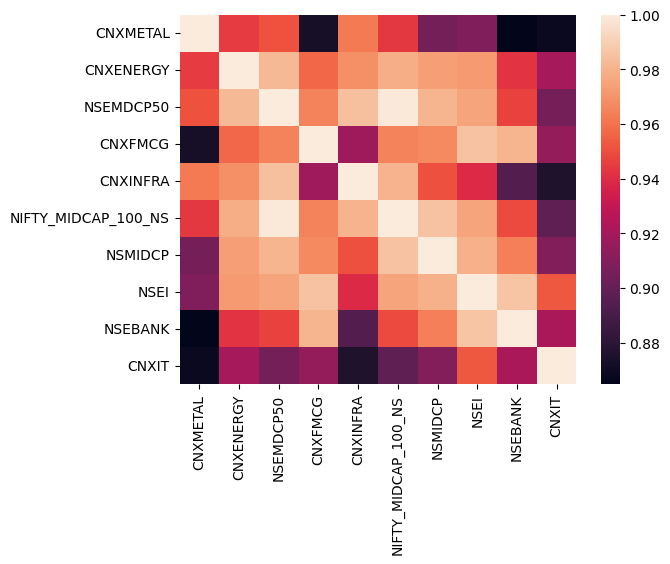

In [ ]:
sns.heatmap(data= correlation_matrix )

In [ ]:
sector_closes.isnull().sum()/len(df)

,0
CNXMETAL,0.989059
CNXENERGY,0.989059
NSEMDCP50,0.989059
CNXFMCG,0.989059
CNXINFRA,0.989059
NIFTY_MIDCAP_100_NS,0.989059
NSMIDCP,0.989059
NSEI,0.989059
NSEBANK,0.989059
CNXIT,0.989059


In [ ]:
sc =  sector_closes.copy()

In [ ]:
sc.to_csv('data.csv')

In [ ]:
# sc['Date'] = pd.to_datetime(sc['Date'])
# data.set_index('Date', inplace=True)

# Forward fill the first non-null value backwards for each column
filled_data = sc.bfill()

# Resample the data to quarterly frequency and take the last value in each quarter
quarterly_data = filled_data.resample('Q').last()

# Display the first few rows of the resampled quarterly data
quarterly_data.head()

<ipython-input-181-3da15651f2a3>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = filled_data.resample('Q').last()


,CNXMETAL,CNXENERGY,NSEMDCP50,CNXFMCG,CNXINFRA,NIFTY_MIDCAP_100_NS,NSMIDCP,NSEI,NSEBANK,CNXIT
Date,,,,,,,,,,
2011-09-30,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-12-31,2835.462291,7707.670654,1980.391302,10264.306025,2464.573903,6790.347821,9369.223378,4957.533707,9038.542342,6035.702180
2012-03-31,3061.690094,7775.570307,2183.143950,10561.584038,2520.238461,7285.302139,9921.096122,5213.844496,9965.054956,6373.279125
2012-06-30,2826.062645,7277.729095,2116.720861,11922.101648,2325.034056,7223.459875,9942.879228,5101.373068,9906.354857,6021.973091
2012-09-30,2751.469002,7718.733669,2102.759240,13194.221786,2374.679343,7331.303249,10189.789752,5350.197292,10507.044582,6020.850549


In [ ]:
quarterly_data.to_csv('data.csv')

In [ ]:
sc = quarterly_data.ffill()

In [ ]:
sc.isnull().sum()/len(sc)

,0
CNXMETAL,0.0
CNXENERGY,0.0
NSEMDCP50,0.0
CNXFMCG,0.0
CNXINFRA,0.0
NIFTY_MIDCAP_100_NS,0.0
NSMIDCP,0.0
NSEI,0.0
NSEBANK,0.0
CNXIT,0.0


In [ ]:
sc.head()

,CNXMETAL,CNXENERGY,NSEMDCP50,CNXFMCG,CNXINFRA,NIFTY_MIDCAP_100_NS,NSMIDCP,NSEI,NSEBANK,CNXIT
Date,,,,,,,,,,
2011-07-12,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-13,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-14,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-15,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-16,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938


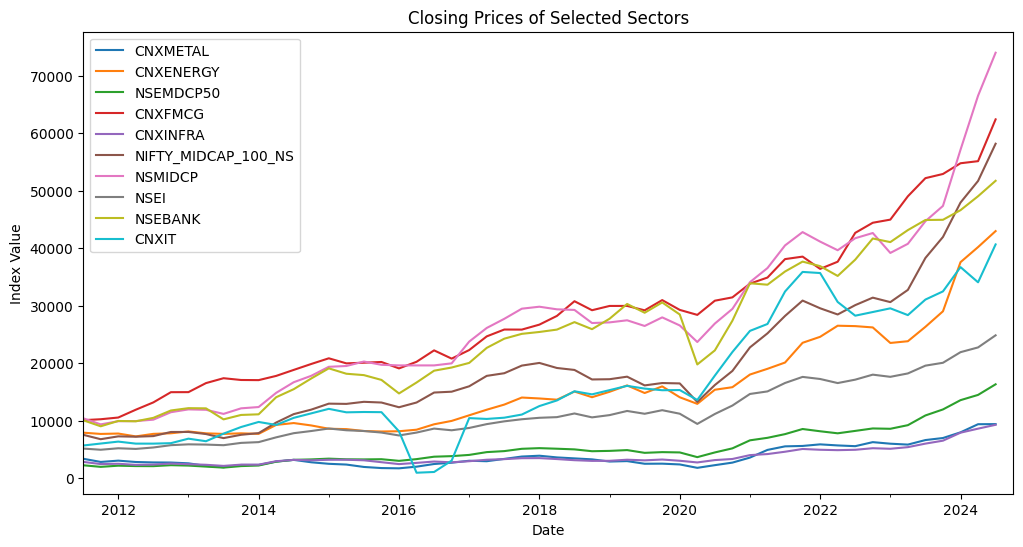

In [ ]:
import matplotlib.pyplot as plt

# Plot closing prices for a few sectors
plt.figure(figsize=(12, 6))
quarterly_data.plot(ax=plt.gca())
plt.title('Closing Prices of Selected Sectors')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()


In [ ]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4844 entries, 2011-07-12 to 2024-10-14
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNXMETAL             4830 non-null   float64
 1   CNXENERGY            4830 non-null   float64
 2   NSEMDCP50            4830 non-null   float64
 3   CNXFMCG              4830 non-null   float64
 4   CNXINFRA             4830 non-null   float64
 5   NIFTY_MIDCAP_100_NS  4830 non-null   float64
 6   NSMIDCP              4830 non-null   float64
 7   NSEI                 4830 non-null   float64
 8   NSEBANK              4830 non-null   float64
 9   CNXIT                4830 non-null   float64
dtypes: float64(10)
memory usage: 416.3 KB


In [ ]:
scc = sc.ffill()

In [ ]:
scc.head()

,CNXMETAL,CNXENERGY,NSEMDCP50,CNXFMCG,CNXINFRA,NIFTY_MIDCAP_100_NS,NSMIDCP,NSEI,NSEBANK,CNXIT
Date,,,,,,,,,,
2011-07-12,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-13,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-14,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-15,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938
2011-07-16,3393.294548,7927.994454,2257.932723,10105.837071,2845.795681,7557.432744,10431.923454,5163.445059,10089.295054,5692.996938


In [ ]:
sc.to_csv('/content/drive/MyDrive/TSA/data/Data Extractors/micro/processed_data/nifty_filled_data.csv')

<Axes: >

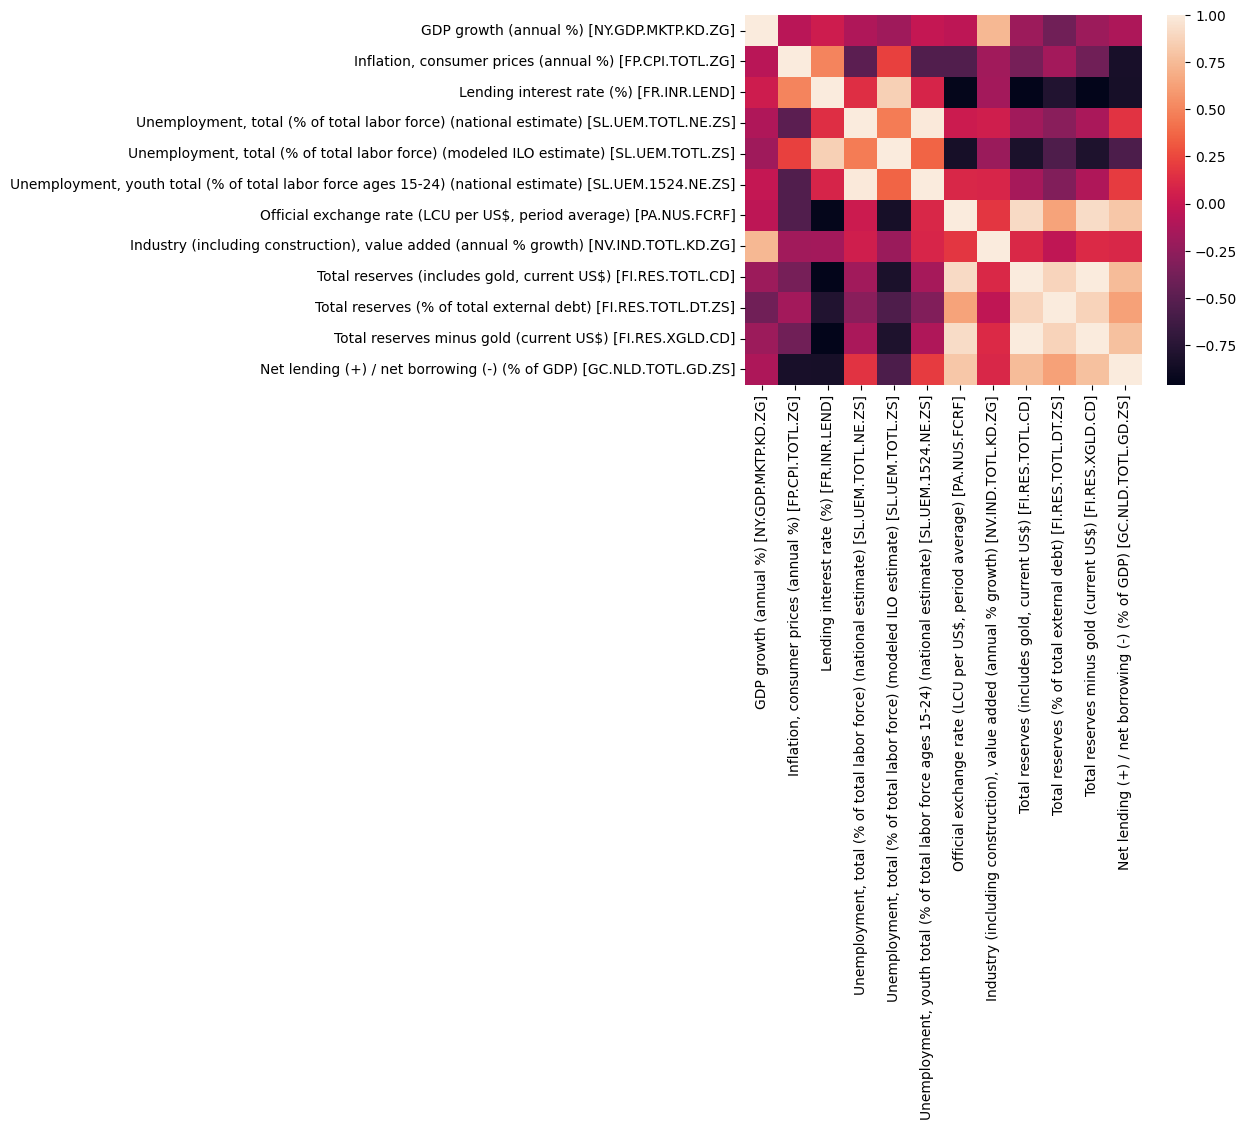

In [ ]:
sns.heatmap(data=sc.corr())

macro Economics Data

In [ ]:
macro_data = pd.read_csv("/content/drive/MyDrive/TSA/data/Data Extractors/macro/India/India_macro_economics.csv")

In [ ]:
macro_data

,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Lending interest rate (%) [FR.INR.LEND],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]",Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS],Total reserves minus gold (current US$) [FI.RES.XGLD.CD],Net lending (+) / net borrowing (-) (% of GDP) [GC.NLD.TOTL.GD.ZS]
0,India,IND,1960.0,YR1960,..,1.779878,..,..,..,..,4.7619,..,6.745366e+08,..,423000000.0,..
1,India,IND,1961.0,YR1961,3.72274253311053,1.695213,..,..,..,..,4.7619,6.71267659356647,6.663571e+08,..,418000000.0,..
2,India,IND,1962.0,YR1962,2.93112773548363,3.632215,..,..,..,..,4.7619,7.07202792355366,5.127918e+08,..,265000000.0,..
3,India,IND,1963.0,YR1963,5.99435326188559,2.946161,..,..,..,..,4.7619,9.44727459195285,6.078625e+08,..,360000000.0,..
4,India,IND,1964.0,YR1964,7.45295012250209,13.355261,..,..,..,..,4.7619,6.47926977162463,4.991451e+08,..,251000000.0,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
macro_data = macro_data.dropna()

In [ ]:
macro_data.head()

,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Lending interest rate (%) [FR.INR.LEND],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]",Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS],Total reserves minus gold (current US$) [FI.RES.XGLD.CD],Net lending (+) / net borrowing (-) (% of GDP) [GC.NLD.TOTL.GD.ZS]
0,India,IND,1960.0,YR1960,..,1.779878,..,..,..,..,4.7619,..,6.745366e+08,..,423000000.0,..
1,India,IND,1961.0,YR1961,3.72274253311053,1.695213,..,..,..,..,4.7619,6.71267659356647,6.663571e+08,..,418000000.0,..
2,India,IND,1962.0,YR1962,2.93112773548363,3.632215,..,..,..,..,4.7619,7.07202792355366,5.127918e+08,..,265000000.0,..
3,India,IND,1963.0,YR1963,5.99435326188559,2.946161,..,..,..,..,4.7619,9.44727459195285,6.078625e+08,..,360000000.0,..
4,India,IND,1964.0,YR1964,7.45295012250209,13.355261,..,..,..,..,4.7619,6.47926977162463,4.991451e+08,..,251000000.0,..


In [ ]:
import numpy as np

In [ ]:
macro_data.replace('..', np.nan, inplace=True)

<ipython-input-268-7577ba6e8516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_data.replace('..', np.nan, inplace=True)


In [ ]:
macro_data.head()

,Country Name,Country Code,Time,Time Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Lending interest rate (%) [FR.INR.LEND],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]",Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS],Total reserves minus gold (current US$) [FI.RES.XGLD.CD],Net lending (+) / net borrowing (-) (% of GDP) [GC.NLD.TOTL.GD.ZS]
0,India,IND,1960.0,YR1960,NaN,1.779878,NaN,NaN,NaN,NaN,4.7619,NaN,6.745366e+08,NaN,423000000.0,NaN
1,India,IND,1961.0,YR1961,3.72274253311053,1.695213,NaN,NaN,NaN,NaN,4.7619,6.71267659356647,6.663571e+08,NaN,418000000.0,NaN
2,India,IND,1962.0,YR1962,2.93112773548363,3.632215,NaN,NaN,NaN,NaN,4.7619,7.07202792355366,5.127918e+08,NaN,265000000.0,NaN
3,India,IND,1963.0,YR1963,5.99435326188559,2.946161,NaN,NaN,NaN,NaN,4.7619,9.44727459195285,6.078625e+08,NaN,360000000.0,NaN
4,India,IND,1964.0,YR1964,7.45295012250209,13.355261,NaN,NaN,NaN,NaN,4.7619,6.47926977162463,4.991451e+08,NaN,251000000.0,NaN


filling na values in the dataset

In [ ]:
macro_data = macro_data.bfill()

In [ ]:
macro_data.isnull().sum()/len(macro_data)

,0
Country Name,0.000000
Country Code,0.000000
Time,0.000000
Time Code,0.000000
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.000000
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.000000
Lending interest rate (%) [FR.INR.LEND],0.015625
"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]",0.000000
"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",0.000000
"Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]",0.000000


In [ ]:
macro_data = macro_data.ffill()

In [ ]:
macro_data.isnull().sum()/len(macro_data)

,0
Country Name,0.0
Country Code,0.0
Time,0.0
Time Code,0.0
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.0
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.0
Lending interest rate (%) [FR.INR.LEND],0.0
"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]",0.0
"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",0.0
"Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]",0.0


In [ ]:
macro_data.to_csv('data_for_ops.csv')

In [ ]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 16 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Country Name                                                                                           64 non-null     object 
 1   Country Code                                                                                           64 non-null     object 
 2   Time                                                                                                   64 non-null     float64
 3   Time Code                                                                                              64 non-null     object 
 4   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                                              64

In [ ]:
macro_data.drop(columns=['Country Code','Time Code'],inplace=True)

In [ ]:
macro_data.drop(columns=['Country Name'],inplace=True)

In [ ]:
for col in macro_data.select_dtypes(include=['object']).columns:
    # non_numeric_values = macro_data[col][pd.to_numeric(macro_data[col], errors='coerce').isna()].unique()
    # if len(non_numeric_values) > 0:
    #     print(f"Non-numeric values in column '{col}': {non_numeric_values}")
    macro_data[col] =  macro_data[col].astype('float64')

In [ ]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 13 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Time                                                                                                   64 non-null     float64
 1   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                                              64 non-null     float64
 2   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                                                 64 non-null     float64
 3   Lending interest rate (%) [FR.INR.LEND]                                                                64 non-null     float64
 4   Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]                   64

In [ ]:
data =  macro_data.copy()

In [ ]:
# Define the start and end years
start_year = int(data['Time'].min())
end_year = 2023

# Define the quarters list with corresponding months
quarters = [(3, 'Q1'), (6, 'Q2'), (9, 'Q3'), (12, 'Q4')]

# Create an empty list to hold the quarterly data
quarterly_data = []

# Iterate over the range of years from start_year to end_year (including 2023)
for year in range(start_year, end_year + 1):
    # Check if we can interpolate (if next year data exists)
    if year + 1 <= end_year:
        year_data = data[data['Time'] == year]
        next_year_data = data[data['Time'] == year + 1]

        # Perform interpolation for each quarter
        for i, (month, quarter) in enumerate(quarters):
            interpolation_factor = i / 4
            quarterly_row = {
                'Time': pd.to_datetime(f'{year}-{month}-01')
            }

            # Interpolate for each column
            for col in data.columns[1:]:
                yearly_value = year_data[col].values[0]
                next_year_value = next_year_data[col].values[0]
                interpolated_value = yearly_value + (next_year_value - yearly_value) * interpolation_factor
                quarterly_row[col] = interpolated_value

            # Append the interpolated row
            quarterly_data.append(quarterly_row)

    # If it's the last year (2023), just copy the values directly for each quarter
    else:
        year_data = data[data['Time'] == year]

        for month, quarter in quarters:
            quarterly_row = {
                'Time': pd.to_datetime(f'{year}-{month}-01')
            }

            # Set the values directly for the last year without interpolation
            for col in data.columns[2:]:
                quarterly_row[col] = year_data[col].values[0]

            # Append the final row for the last year
            quarterly_data.append(quarterly_row)

# Create a new dataframe from the quarterly data
quarterly_df = pd.DataFrame(quarterly_data)

# Set the 'Time' column as the index
quarterly_df.set_index('Time', inplace=True)

# Display the first few rows of the quarterly data
quarterly_df.head()


,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Lending interest rate (%) [FR.INR.LEND],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]",Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS],Total reserves minus gold (current US$) [FI.RES.XGLD.CD],Net lending (+) / net borrowing (-) (% of GDP) [GC.NLD.TOTL.GD.ZS]
Time,,,,,,,,,,,,
1960-03-01,3.722743,1.779878,13.5,2.147,6.85,6.23,4.7619,6.712677,6.745366e+08,13.354661,423000000.0,-0.085666
1960-06-01,3.722743,1.758712,13.5,2.147,6.85,6.23,4.7619,6.712677,6.724917e+08,13.354661,421750000.0,-0.085666
1960-09-01,3.722743,1.737545,13.5,2.147,6.85,6.23,4.7619,6.712677,6.704469e+08,13.354661,420500000.0,-0.085666
1960-12-01,3.722743,1.716379,13.5,2.147,6.85,6.23,4.7619,6.712677,6.684020e+08,13.354661,419250000.0,-0.085666
1961-03-01,3.722743,1.695213,13.5,2.147,6.85,6.23,4.7619,6.712677,6.663571e+08,13.354661,418000000.0,-0.085666


In [ ]:
quarterly_df.isnull().sum()/len(quarterly_df)

,0
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.015625
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.000000
Lending interest rate (%) [FR.INR.LEND],0.000000
"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]",0.000000
"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",0.000000
"Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]",0.000000
"Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]",0.000000
"Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]",0.000000
"Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]",0.000000
Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS],0.000000


In [ ]:
sc = quarterly_df.ffill()

In [ ]:
quarterly_df.to_csv('/content/drive/MyDrive/TSA/data/Data Extractors/micro/processed_data/macro_india.csv')

In [ ]:
sc.tail()

,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Lending interest rate (%) [FR.INR.LEND],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]","Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]",Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS],Total reserves minus gold (current US$) [FI.RES.XGLD.CD],Net lending (+) / net borrowing (-) (% of GDP) [GC.NLD.TOTL.GD.ZS]
Time,,,,,,,,,,,,
2022-12-01,7.434738,5.911616,8.567143,4.3345,4.3345,16.06575,81.600580,7.292969,6.126691e+11,91.965019,5.612364e+11,-2.303289
2023-03-01,7.434738,5.649143,8.567143,4.1720,4.1720,15.46900,82.599276,9.021498,6.277928e+11,91.965019,5.745088e+11,-2.303289
2023-06-01,7.434738,5.649143,8.567143,4.1720,4.1720,15.46900,82.599276,9.021498,6.277928e+11,91.965019,5.745088e+11,-2.303289
2023-09-01,7.434738,5.649143,8.567143,4.1720,4.1720,15.46900,82.599276,9.021498,6.277928e+11,91.965019,5.745088e+11,-2.303289
2023-12-01,7.434738,5.649143,8.567143,4.1720,4.1720,15.46900,82.599276,9.021498,6.277928e+11,91.965019,5.745088e+11,-2.303289


In [ ]:
# Create a slice of the dataset from 2011 to 2023
quarterly_df_slice = sc.loc['2011-01-01':'2023-12-01']

# Display the sliced dataset

print(quarterly_df_slice)

# Optionally, save the slice to a new CSV file
quarterly_df_slice.to_csv('/content/drive/MyDrive/TSA/data/Data Extractors/micro/processed_data/macro_india.csv')


            GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]  \
Time                                                    
2011-03-01                                   5.241316   
2011-06-01                                   5.295084   
2011-09-01                                   5.348852   
2011-12-01                                   5.402620   
2012-03-01                                   5.456388   
2012-06-01                                   5.688817   
2012-09-01                                   5.921247   
2012-12-01                                   6.153677   
2013-03-01                                   6.386106   
2013-06-01                                   6.642137   
2013-09-01                                   6.898167   
2013-12-01                                   7.154197   
2014-03-01                                   7.410228   
2014-06-01                                   7.556734   
2014-09-01                                   7.703241   
2014-12-01                     

In [ ]:
sc = quarterly_df_slice.copy()

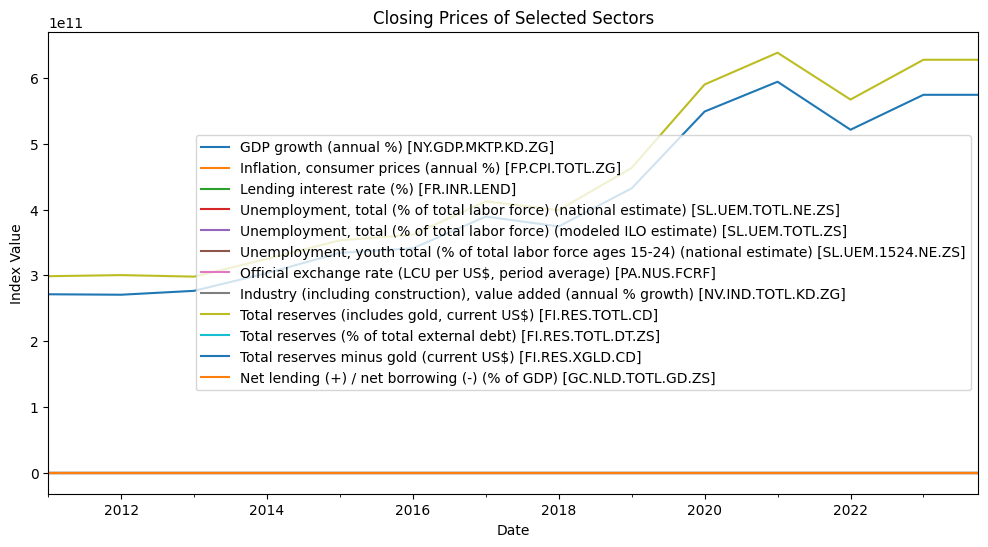

In [ ]:
import matplotlib.pyplot as plt

# Plot closing prices for a few sectors
plt.figure(figsize=(12, 6))
sc.plot(ax=plt.gca())
plt.title('Closing Prices of Selected Sectors')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()


handling  the data for the global indicators

In [ ]:
global_df = pd.read_csv('/content/drive/MyDrive/TSA/data/Data Extractors/macro/world/world_indicators.csv')

In [ ]:
print(global_df)

                                        Country Name Country Code    Time  \
0                                              World          WLD  1960.0   
1                                              World          WLD  1961.0   
2                                              World          WLD  1962.0   
3                                              World          WLD  1963.0   
4                                              World          WLD  1964.0   
..                                               ...          ...     ...   
64                                               NaN          NaN     NaN   
65                                               NaN          NaN     NaN   
66                                               NaN          NaN     NaN   
67  Data from database: World Development Indicators          NaN     NaN   
68                          Last Updated: 09/19/2024          NaN     NaN   

   Time Code GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]  \
0     YR1960     

In [ ]:
global_df = global_df.dropna()

In [ ]:
global_df.isnull().sum()/len(global_df)

,0
Country Name,0.0
Country Code,0.0
Time,0.0
Time Code,0.0
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.0
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.0
Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],0.0


In [ ]:
global_df.replace('..', np.nan, inplace=True)

In [ ]:
global_df.isnull().sum()/len(global_df)

,0
Country Name,0.000000
Country Code,0.000000
Time,0.000000
Time Code,0.000000
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.015625
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.328125
Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],0.000000


In [ ]:
global_df.drop(columns=['Country Name','Country Code','Time Code'],inplace=True)

In [ ]:
for col in global_df.select_dtypes(include=['object']).columns:
    # non_numeric_values = macro_data[col][pd.to_numeric(macro_data[col], errors='coerce').isna()].unique()
    # if len(non_numeric_values) > 0:
    #     print(f"Non-numeric values in column '{col}': {non_numeric_values}")
    global_df[col] =  global_df[col].astype('float64')

In [ ]:
global_df.isnull().sum()/len(global_df)

,0
Time,0.000000
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.015625
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.328125
Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],0.000000


In [ ]:
global_df = global_df.bfill()

In [ ]:
global_df.isnull().sum()/len(global_df)

,0
Time,0.0
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.0
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.0
Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],0.0


In [ ]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Time                                                    64 non-null     float64
 1   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]               64 non-null     float64
 2   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]  64 non-null     float64
 3   Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]        64 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [ ]:
data = global_df.copy()

In [ ]:
# Define the start and end years
start_year = int(data['Time'].min())
end_year = 2023

# Define the quarters list with corresponding months
quarters = [(3, 'Q1'), (6, 'Q2'), (9, 'Q3'), (12, 'Q4')]

# Create an empty list to hold the quarterly data
quarterly_data = []

# Iterate over the range of years from start_year to end_year (including 2023)
for year in range(start_year, end_year + 1):
    # Check if we can interpolate (if next year data exists)
    if year + 1 <= end_year:
        year_data = data[data['Time'] == year]
        next_year_data = data[data['Time'] == year + 1]

        # Perform interpolation for each quarter
        for i, (month, quarter) in enumerate(quarters):
            interpolation_factor = i / 4
            quarterly_row = {
                'Time': pd.to_datetime(f'{year}-{month}-01')
            }

            # Interpolate for each column
            for col in data.columns[1:]:
                yearly_value = year_data[col].values[0]
                next_year_value = next_year_data[col].values[0]
                interpolated_value = yearly_value + (next_year_value - yearly_value) * interpolation_factor
                quarterly_row[col] = interpolated_value

            # Append the interpolated row
            quarterly_data.append(quarterly_row)

    # If it's the last year (2023), just copy the values directly for each quarter
    else:
        year_data = data[data['Time'] == year]

        for month, quarter in quarters:
            quarterly_row = {
                'Time': pd.to_datetime(f'{year}-{month}-01')
            }

            # Set the values directly for the last year without interpolation
            for col in data.columns[2:]:
                quarterly_row[col] = year_data[col].values[0]

            # Append the final row for the last year
            quarterly_data.append(quarterly_row)

# Create a new dataframe from the quarterly data
quarterly_df = pd.DataFrame(quarterly_data)

# Set the 'Time' column as the index
quarterly_df.set_index('Time', inplace=True)

# Display the first few rows of the quarterly data
quarterly_df.head()


,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]
Time,,,
1960-03-01,3.969728,12.442437,17.516351
1960-06-01,3.969728,12.442437,17.455666
1960-09-01,3.969728,12.442437,17.394981
1960-12-01,3.969728,12.442437,17.334295
1961-03-01,3.969728,12.442437,17.273610


In [ ]:
quarterly_df.isnull().sum()/len(quarterly_df)

,0
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],0.015625
"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",0.000000
Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],0.000000


In [ ]:
quarterly_df = quarterly_df.ffill()

In [ ]:
# Create a slice of the dataset from 2011 to 2023
quarterly_df_slice = quarterly_df.loc['2011-01-01':'2023-12-01']

# Display the sliced dataset
print(quarterly_df_slice)

# Optionally, save the slice to a new CSV file
quarterly_df_slice.to_csv('/content/drive/MyDrive/TSA/data/Data Extractors/micro/processed_data/macro_global.csv')


            GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]  \
Time                                                    
2011-03-01                                   3.327133   
2011-06-01                                   3.172628   
2011-09-01                                   3.018124   
2011-12-01                                   2.863620   
2012-03-01                                   2.709115   
2012-06-01                                   2.748892   
2012-09-01                                   2.788669   
2012-12-01                                   2.828445   
2013-03-01                                   2.868222   
2013-06-01                                   2.932134   
2013-09-01                                   2.996046   
2013-12-01                                   3.059958   
2014-03-01                                   3.123870   
2014-06-01                                   3.124436   
2014-09-01                                   3.125003   
2014-12-01                     

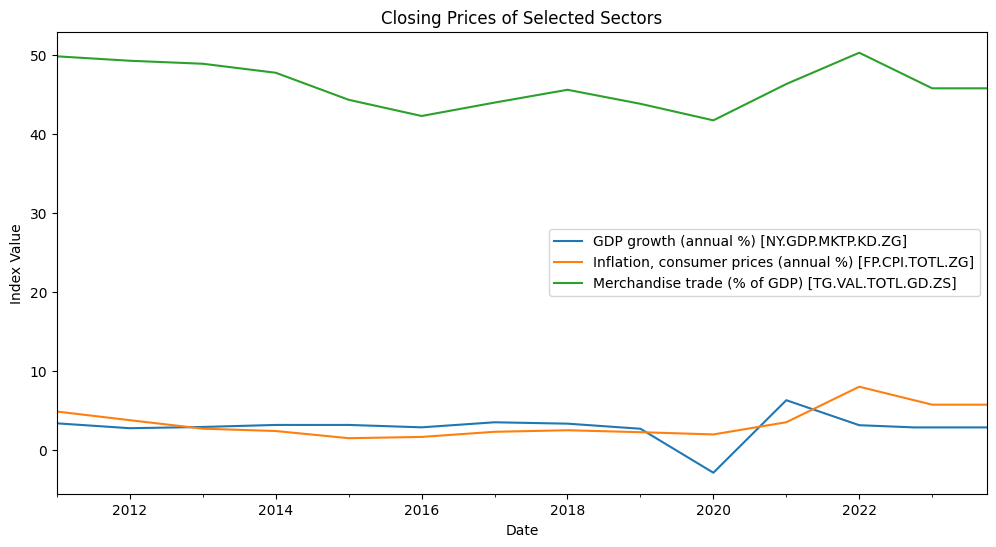

In [ ]:
import matplotlib.pyplot as plt

# Plot closing prices for a few sectors
plt.figure(figsize=(12, 6))
quarterly_df_slice.plot(ax=plt.gca())
plt.title('Closing Prices of Selected Sectors')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()


<Axes: >

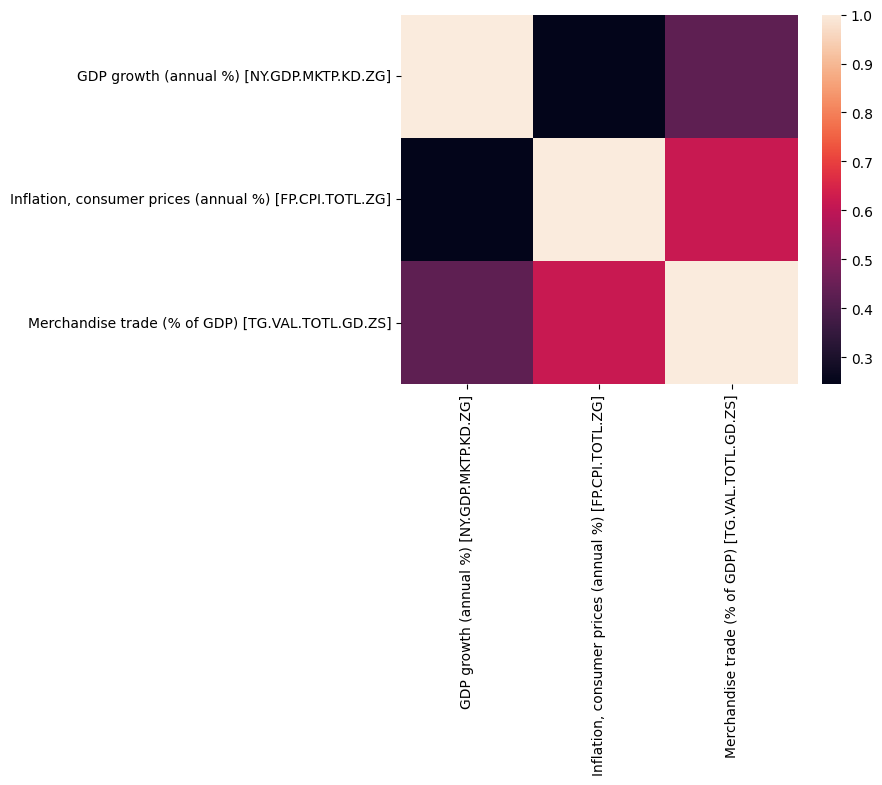

In [ ]:
sns.heatmap(data=quarterly_df_slice.corr())

Minerals

In [ ]:
import pandas as pd
import glob
import os

# Define the data path
data_path = "/content/drive/MyDrive/TSA/data/Data Extractors/micro/natural_resources/mineral_data/mineral_data_updated"

# Get a list of all CSV files in the directory
all_files = glob.glob(os.path.join(data_path, "*.csv"))

# Create a dictionary to store dataframes for each mineral
minerals_data = {}
for file in all_files:
    minerals_name = os.path.basename(file).split('.')[0]  # Extract mineral name from filename
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')  # Read with datetime index
    minerals_data[minerals_name] = df  # Store dataframe in dictionary

# Print the number of minerals loaded and their names
print(f"Loaded {len(minerals_data)} minerals: {list(minerals_data.keys())}")


Loaded 12 minerals: ['RB_F', 'PL_F', 'CL_F', 'HO_F', 'NG_F', 'PA_F', 'HG_F', 'SI_F', 'BZ_F', 'GC_F', 'ALI_F', 'ZNC_F']


In [ ]:
min_allowed_date = pd.Timestamp('2011-01-01')
max_date = min([df.index.max() for df in minerals_data.values()])

# Process each mineral dataset
for mineral, df in minerals_data.items():
    # Reindex to ensure all dates from '2011-01-01' to max_date are present
    full_date_range = pd.date_range(start=min_allowed_date, end=max_date, freq='D')
    df = df.reindex(full_date_range)

    # Forward-fill or back-fill missing values
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Resample 'Close' column to quarterly frequency and calculate quarterly mean
    df_quarterly = df['Close'].resample('Q').mean()

    # Add quarterly close and return columns to the dataframe
    df['Quarterly_close'] = df_quarterly
    df['Quarterly_return'] = df_quarterly.pct_change()

    # Update the dictionary with the new dataframe, keeping relevant columns only
    minerals_data[mineral] = df[
        ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Quarterly_close', 'Quarterly_return']
    ]


<ipython-input-344-d1e4dbc1dc80>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-344-d1e4dbc1dc80>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-344-d1e4dbc1dc80>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-344-d1e4dbc1dc80>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-344-d1e4dbc1dc80>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Close'].resample('Q').mean()
<ipython-input-344-d1e4dbc1dc80>:15: FutureWarning: 'Q' is deprecated 

In [ ]:
minerals_data['CL_F']

,Open,High,Low,Close,Adj Close,Volume,Quarterly_close,Quarterly_return
2011-01-01,58.840000,59.270000,58.040001,58.330002,58.330002,286035.0,NaN,NaN
2011-01-02,58.840000,59.270000,58.040001,58.330002,58.330002,286035.0,NaN,NaN
2011-01-03,58.840000,59.270000,58.040001,58.330002,58.330002,286035.0,NaN,NaN
2011-01-04,58.840000,59.270000,58.040001,58.330002,58.330002,286035.0,NaN,NaN
2011-01-05,58.840000,59.270000,58.040001,58.330002,58.330002,286035.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-10-07,74.400002,77.400002,73.620003,77.139999,77.139999,419018.0,NaN,NaN
2024-10-08,77.330002,78.459999,72.690002,73.570000,73.570000,496760.0,NaN,NaN
2024-10-09,73.839996,74.449997,71.529999,73.239998,73.239998,401159.0,NaN,NaN
2024-10-10,73.389999,76.239998,73.260002,75.849998,75.849998,321453.0,NaN,NaN


In [ ]:
mineral_closes = pd.DataFrame({mineral: df['Quarterly_close'] for mineral, df in minerals_data.items()})

# Calculate the correlation matrix of quarterly closes
correlation_matrix = mineral_closes.corr()

# Print the correlation matrix
print("\nCorrelation Matrix of Mineral Data Quarterly Closes:\n")
print(correlation_matrix)


Correlation Matrix of Mineral Data Quarterly Closes:

           RB_F      PL_F      CL_F      HO_F      NG_F      PA_F      HG_F  \
RB_F   1.000000  0.206436  0.954386  0.906963  0.627761  0.161212  0.676821   
PL_F   0.206436  1.000000  0.033552 -0.089199 -0.041827 -0.220218  0.020240   
CL_F   0.954386  0.033552  1.000000  0.959668  0.665082  0.308309  0.780138   
HO_F   0.906963 -0.089199  0.959668  1.000000  0.721371  0.327844  0.708340   
NG_F   0.627761 -0.041827  0.665082  0.721371  1.000000  0.374611  0.415621   
PA_F   0.161212 -0.220218  0.308309  0.327844  0.374611  1.000000  0.628578   
HG_F   0.676821  0.020240  0.780138  0.708340  0.415621  0.628578  1.000000   
SI_F   0.388833  0.034733  0.502365  0.437269  0.171011  0.617803  0.867087   
BZ_F   0.939803 -0.027091  0.994077  0.965798  0.657556  0.313427  0.763477   
GC_F   0.399517 -0.212563  0.530740  0.513634  0.172253  0.637581  0.839905   
ALI_F  0.680980 -0.158981  0.812258  0.746453  0.582431  0.539783  0.863810 

In [ ]:
mineral_closes.head()

,RB_F,PL_F,CL_F,HO_F,NG_F,PA_F,HG_F,SI_F,BZ_F,GC_F,ALI_F,ZNC_F
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sc['Date'] = pd.to_datetime(sc['Date'])
# data.set_index('Date', inplace=True)

# Forward fill the first non-null value backwards for each column
filled_data = mineral_closes.bfill()

# Resample the data to quarterly frequency and take the last value in each quarter
quarterly_data = filled_data.resample('Q').last()

# Display the first few rows of the resampled quarterly data
quarterly_data.head()

<ipython-input-351-c689d64ba62b>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = filled_data.resample('Q').last()


,RB_F,PL_F,CL_F,HO_F,NG_F,PA_F,HG_F,SI_F,BZ_F,GC_F,ALI_F,ZNC_F
2011-03-31,2.0303,1081.400024,58.330002,1.8366,2.805,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0
2011-06-30,2.0303,1081.400024,58.330002,1.8366,2.805,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0
2011-09-30,2.0303,1081.400024,58.330002,1.8366,2.805,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0
2011-12-31,2.0303,1081.400024,58.330002,1.8366,2.805,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0
2012-03-31,2.0303,1081.400024,58.330002,1.8366,2.805,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0


In [ ]:
sc = quarterly_data.ffill()

In [ ]:
sc.isnull().sum()/len(sc)

,0
RB_F,0.0
PL_F,0.0
CL_F,0.0
HO_F,0.0
NG_F,0.0
PA_F,0.0
HG_F,0.0
SI_F,0.0
BZ_F,0.0
GC_F,0.0


<Axes: >

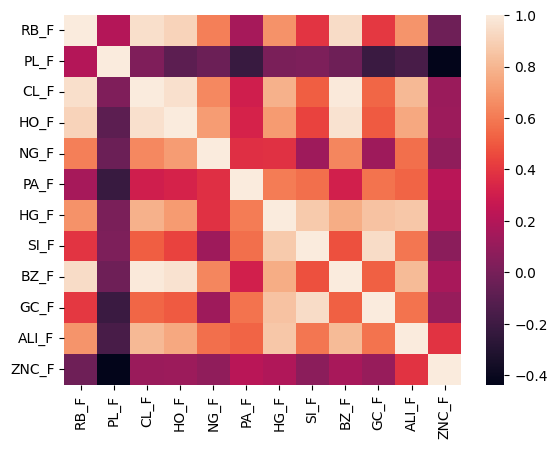

In [ ]:
sns.heatmap(data=sc.corr())

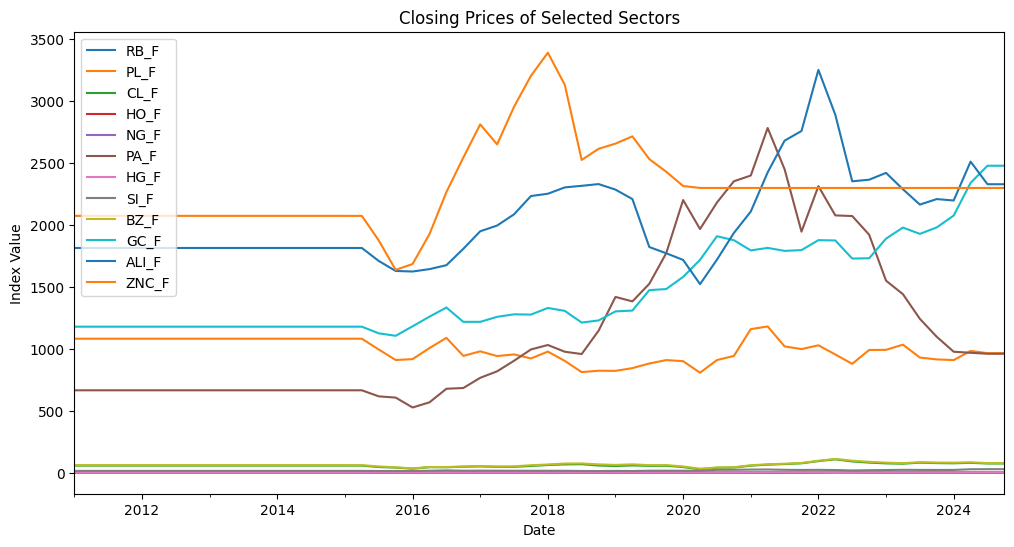

In [ ]:
import matplotlib.pyplot as plt

# Plot closing prices for a few sectors
plt.figure(figsize=(12, 6))
sc.plot(ax=plt.gca())
plt.title('Closing Prices of Selected Sectors')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()


In [ ]:
sc.to_csv('/content/drive/MyDrive/TSA/data/Data Extractors/micro/processed_data/minearls_quarter.csv')

MODEL BUILDING

In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
micro_df = pd.read_csv('microeconomics_nifty_sector_Quaterly.csv', parse_dates=['Date'], dayfirst=True)
macro_df = pd.read_csv('macro_economics_India_diffparams_Quaterlty.csv', parse_dates=['Time'], dayfirst=True)
minerals_df = pd.read_csv('mineral_Quater_micro_diff.csv', parse_dates=['Date'], dayfirst=True)
global_macro_df = pd.read_csv('macro_global_Quaterly_Diiff_param.csv', parse_dates=['Time'], dayfirst=True)

# Check for missing data
print("Microeconomics Missing Values:\n", micro_df.isna().sum())
print("Macroeconomics Missing Values:\n", macro_df.isna().sum())
print("Macroeconomics Missing Values:\n", minerals_df.isna().sum())
print("Macroeconomics Missing Values:\n", global_macro_df.isna().sum())



# Fill or Drop NaNs (You can choose one approach)
micro_df.fillna(method='ffill', inplace=True)  # Forward fill
macro_df.fillna(method='bfill', inplace=True)  # Backward fill
minerals_df.fillna(method='bfill', inplace=True)  # Backward fill
global_macro_df.fillna(method='bfill', inplace=True)  # Backward fill




# Convert columns to numeric (if necessary)
micro_df.iloc[:, 1:] = micro_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
macro_df.iloc[:, 1:] = macro_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
minerals_df.iloc[:, 1:] = minerals_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
global_macro_df.iloc[:, 1:] = global_macro_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')



# Ensure proper sorting by date
micro_df.sort_values('Date', inplace=True)
macro_df.sort_values('Time', inplace=True)
minerals_df.sort_values('Date', inplace=True)
global_macro_df.sort_values('Time', inplace=True)


# Print summary statistics
print(micro_df.describe())
print(macro_df.describe())
print(minerals_df.describe())
print(global_macro_df.describe())



Microeconomics Missing Values:
 Date                   0
CNXMETAL               1
CNXENERGY              1
NSEMDCP50              1
CNXFMCG                1
CNXINFRA               1
NIFTY_MIDCAP_100_NS    1
NSMIDCP                1
NSEI                   1
NSEBANK                1
CNXIT                  1
dtype: int64
Macroeconomics Missing Values:
 Time                                                                                                     0
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                                                   0
Lending interest rate (%) [FR.INR.LEND]                                                                  0
Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]                     0
Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]                     0
Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]    0
Offici

<ipython-input-357-385b56d039e4>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  micro_df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-357-385b56d039e4>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_df.fillna(method='bfill', inplace=True)  # Backward fill
<ipython-input-357-385b56d039e4>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  minerals_df.fillna(method='bfill', inplace=True)  # Backward fill
<ipython-input-357-385b56d039e4>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  global_macro_df.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:
def convert_to_quarter(date_col):
    return date_col.dt.to_period('Q').astype(str)

# Apply the conversion to all relevant datasets
micro_df['Quarter'] = convert_to_quarter(micro_df['Date'])
macro_df['Quarter'] = convert_to_quarter(macro_df['Time'])
minerals_df['Quarter'] = convert_to_quarter(minerals_df['Date'])
global_macro_df['Quarter'] = convert_to_quarter(global_macro_df['Time'])

# Drop old date columns, if no longer needed
microeconomics_df = micro_df.drop(columns=['Date'])
macro_india_df = macro_df.drop(columns=['Time'])
minerals_df = minerals_df.drop(columns=['Date'])
macro_global_df = global_macro_df.drop(columns=['Time'])

# Example: Print out the transformed DataFrames
print(microeconomics_df.head())
print(macro_india_df.head())
print(minerals_df.head())
print(macro_global_df.head())

      CNXMETAL    CNXENERGY    NSEMDCP50      CNXFMCG     CNXINFRA  \
0  3393.294548  7927.994454  2257.932723  10105.83707  2845.795681   
1  2835.462291  7707.670654  1980.391302  10264.30602  2464.573903   
2  3061.690094  7775.570307  2183.143950  10561.58404  2520.238461   
3  2826.062645  7277.729095  2116.720861  11922.10165  2325.034056   
4  2751.469002  7718.733669  2102.759240  13194.22179  2374.679343   

   NIFTY_MIDCAP_100_NS       NSMIDCP         NSEI       NSEBANK        CNXIT  \
0          7557.432744  10431.923450  5163.445059  10089.295050  5692.996938   
1          6790.347821   9369.223378  4957.533707   9038.542342  6035.702180   
2          7285.302139   9921.096122  5213.844496   9965.054956  6373.279125   
3          7223.459875   9942.879228  5101.373068   9906.354857  6021.973091   
4          7331.303249  10189.789750  5350.197292  10507.044580  6020.850549   

  Quarter  
0  2011Q3  
1  2011Q4  
2  2012Q1  
3  2012Q2  
4  2012Q3  
   Inflation, consumer pri

In [ ]:
import pandas as pd



# Step 1: Get a list of all unique quarters from all datasets
all_quarters = pd.concat([
    micro_df['Quarter'],
    macro_df['Quarter'],
    minerals_df['Quarter'],
    global_macro_df['Quarter']
]).drop_duplicates().sort_values().reset_index(drop=True)

# Step 2: Create a master DataFrame with all possible quarters
master_df = pd.DataFrame({'Quarter': all_quarters})

# Step 3: Merge all datasets into the master DataFrame using 'outer' join
combined_df = master_df.merge(micro_df, on='Quarter', how='outer') \
                       .merge(macro_df, on='Quarter', how='outer') \
                       .merge(minerals_df, on='Quarter', how='outer') \
                       .merge(global_macro_df, on='Quarter', how='outer')

# Step 4: Fill missing values with 0 (or use any other strategy)
combined_df = combined_df.fillna(0)

# Example: Print out the combined DataFrame
print(combined_df.head())

# Step 5: Save the combined DataFrame to a new CSV
combined_df.to_csv('combined_quarterly_data.csv', index=False)


  Quarter                 Date     CNXMETAL    CNXENERGY    NSEMDCP50  \
0  2011Q1                    0     0.000000     0.000000     0.000000   
1  2011Q2                    0     0.000000     0.000000     0.000000   
2  2011Q3  2011-09-30 00:00:00  3393.294548  7927.994454  2257.932723   
3  2011Q4  2011-12-31 00:00:00  2835.462291  7707.670654  1980.391302   
4  2012Q1  2012-03-31 00:00:00  3061.690094  7775.570307  2183.143950   

       CNXFMCG     CNXINFRA  NIFTY_MIDCAP_100_NS       NSMIDCP         NSEI  \
0      0.00000     0.000000             0.000000      0.000000     0.000000   
1      0.00000     0.000000             0.000000      0.000000     0.000000   
2  10105.83707  2845.795681          7557.432744  10431.923450  5163.445059   
3  10264.30602  2464.573903          6790.347821   9369.223378  4957.533707   
4  10561.58404  2520.238461          7285.302139   9921.096122  5213.844496   

   ...    HG_F    SI_F       BZ_F    GC_F   ALI_F   ZNC_F  \
0  ...  2.6385  15.664  6

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller

# Step 1: Load the data
data = pd.read_csv('combined_quarterly_data.csv')

# Drop unwanted columns (date, time) and drop constant columns
data = data.drop(columns=['Date', 'Time' ,'Time_x' , 'Time_y'], errors='ignore')
data = data.loc[:, (data != data.iloc[0]).any()]  # Drop constant columns

# Convert 'Quarter' column to datetime and set as index
data['Quarter'] = pd.to_datetime(data['Quarter'], errors='coerce')
data.set_index('Quarter', inplace=True)

# Ensure the index has quarterly frequency
data = data.asfreq('Q', method='pad')  # Pad missing dates if necessary

# Convert columns to numeric, drop non-numeric columns
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(axis=1, how='all')

# Step 2: Check Stationarity
def adf_test(series):
    result = adfuller(series.dropna())  # Handle NaN values
    print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')
    return result[1]  # Return p-value for further use

# Perform ADF test on each column and track non-stationary columns
non_stationary_columns = []
for col in data.columns:
    try:
        p_value = adf_test(data[col])
        if p_value > 0.05:
            non_stationary_columns.append(col)
    except ValueError as e:
        print(f"Could not perform ADF test on {col}: {e}")

# Step 3: Differencing to achieve stationarity
data_diff = data.diff().dropna()

# Recheck stationarity after differencing
for col in non_stationary_columns:
    print(f"\nRechecking stationarity for {col}:")
    try:
        adf_test(data_diff[col])
    except ValueError as e:
        print(f"Could not perform ADF test on {col}: {e}")

# Step 4: Check for multicollinearity and drop highly correlated variables
corr_matrix = data_diff.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Drop highly correlated variables (correlation > 0.95)
threshold = 0.95
to_drop = [col for col in corr_matrix.columns if any(corr_matrix[col] > threshold)]
print("\nColumns to drop due to high correlation:", to_drop)

data_diff = data_diff.drop(columns=to_drop)

# Step 5: Fit VAR Model with enforced lag 1 (since lag 0 is not meaningful)
model = VAR(data_diff)

# Force the model to use lag 1
optimal_lag = 1
print(f"\nEnforced Lag Selected: {optimal_lag}")

# Fit the VAR model with the enforced lag
result = model.fit(optimal_lag)

# Step 6: Forecasting the next 4 quarters
forecast = result.forecast(data_diff.values[-optimal_lag:], steps=4)

if len(forecast) == 0:
    print("Warning: No forecast data generated. Check data availability or model fitting.")
else:
    print("\nForecast for next 4 quarters:\n", forecast)

# Step 7: Model Evaluation (using RMSE)
if len(forecast) > 0:
    y_true = data.iloc[-4:, 0]  # Actual values of the target variable (e.g., NIFTY returns)
    y_pred = forecast[:, 0]  # Predicted values of the target variable
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    print(f"\nRoot Mean Square Error (RMSE): {rmse}")
else:
    print("RMSE evaluation skipped due to lack of forecast data.")


<ipython-input-382-0b0948537da3>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Quarter'] = pd.to_datetime(data['Quarter'], errors='coerce')
<ipython-input-382-0b0948537da3>:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data = data.asfreq('Q', method='pad')  # Pad missing dates if necessary


ADF Statistic: 1.391343236946689, p-value: 0.9970744586117399
ADF Statistic: 1.9504451708498372, p-value: 0.9986049935526141
ADF Statistic: 2.782582352561775, p-value: 1.0
ADF Statistic: 2.709347079797015, p-value: 0.999087455254852
ADF Statistic: 2.437173639117221, p-value: 0.999026743786298
ADF Statistic: 2.097470385484678, p-value: 0.9987869593870837
ADF Statistic: 1.2547659121230006, p-value: 0.9963432584796372
ADF Statistic: 0.3530234251858766, p-value: 0.9796505863761726
ADF Statistic: 0.7495736294921121, p-value: 0.9907770075463557
ADF Statistic: 0.6285597934085374, p-value: 0.9882988276408714
ADF Statistic: -0.5446457337369225, p-value: 0.8830058339105535
ADF Statistic: 0.28853103538514874, p-value: 0.9768121350696247
ADF Statistic: 0.23478750998637485, p-value: 0.9741465985417831
ADF Statistic: 4.590830521599895, p-value: 1.0
ADF Statistic: -0.86500437377384, p-value: 0.7992784777213343
ADF Statistic: -1.9182831990744795, p-value: 0.3235095996661399
ADF Statistic: -3.832551411

IndexError: index 0 is out of bounds for axis 1 with size 0

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2011-03-31 to 2024-09-30
Freq: QE-DEC
Data columns (total 36 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   CNXMETAL                                                                                               55 non-null     float64
 1   CNXENERGY                                                                                              55 non-null     float64
 2   NSEMDCP50                                                                                              55 non-null     float64
 3   CNXFMCG                                                                                                55 non-null     float64
 4   CNXINFRA                                                           

In [384]:
data.head()

,CNXMETAL,CNXENERGY,NSEMDCP50,CNXFMCG,CNXINFRA,NIFTY_MIDCAP_100_NS,NSMIDCP,NSEI,NSEBANK,CNXIT,...,PA_F,HG_F,SI_F,BZ_F,GC_F,ALI_F,ZNC_F,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_y",Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]
Quarter,,,,,,,,,,,,,,,,,,,,,
2011-03-31,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0,3.327133,4.822396,49.840926
2011-06-30,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0,3.172628,4.548129,49.700854
2011-09-30,3393.294548,7927.994454,2257.932723,10105.83707,2845.795681,7557.432744,10431.923450,5163.445059,10089.295050,5692.996938,...,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0,3.018124,4.273862,49.560782
2011-12-31,2835.462291,7707.670654,1980.391302,10264.30602,2464.573903,6790.347821,9369.223378,4957.533707,9038.542342,6035.702180,...,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0,2.863620,3.999594,49.420710
2012-03-31,3061.690094,7775.570307,2183.143950,10561.58404,2520.238461,7285.302139,9921.096122,5213.844496,9965.054956,6373.279125,...,665.450012,2.6385,15.664,62.009998,1178.5,1813.0,2072.0,2.709115,3.725327,49.280638


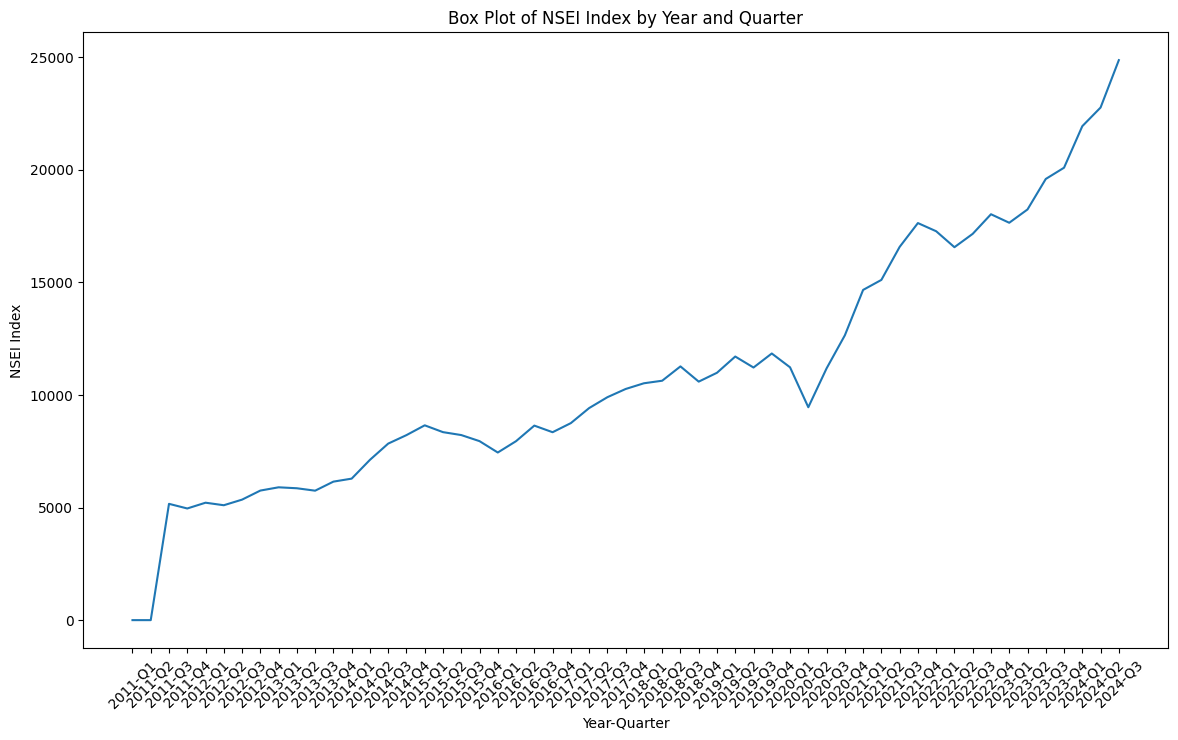

In [386]:
df = data.copy()  # Use the combined DataFrame you provided

# Convert the index to DateTime if it isn’t already
df.index = pd.to_datetime(df.index)

# Extract 'Year' and 'Quarter' from the index for easier plotting
df['Year'] = df.index.year
df['Quarter_Num'] = df.index.quarter  # Get quarter number (1, 2, 3, 4)
df['Year_Quarter'] = df['Year'].astype(str) + '-Q' + df['Quarter_Num'].astype(str)

# Example: Boxplot of NSEI Index by Year-Quarter
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_Quarter', y='NSEI', data=df)

plt.title('Line Plot of NSEI Index by Year and Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('NSEI Index')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [388]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

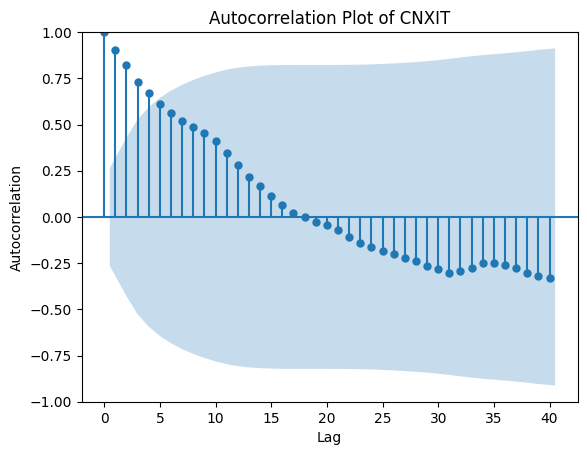

In [389]:
plt.figure(figsize=(10, 6))

# 1. Autocorrelation Plot of CNXIT (Microeconomic Indicator)
plt.figure(figsize=(10, 6))
plot_acf(df['CNXIT'], lags=40)
plt.title('Autocorrelation Plot of CNXIT')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

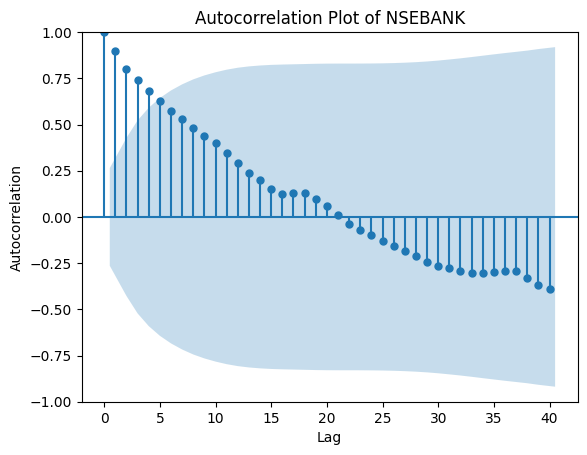

In [390]:
plt.figure(figsize=(10, 6))
plot_acf(df['NSEBANK'], lags=40)
plt.title('Autocorrelation Plot of NSEBANK')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


<Figure size 1000x600 with 0 Axes>

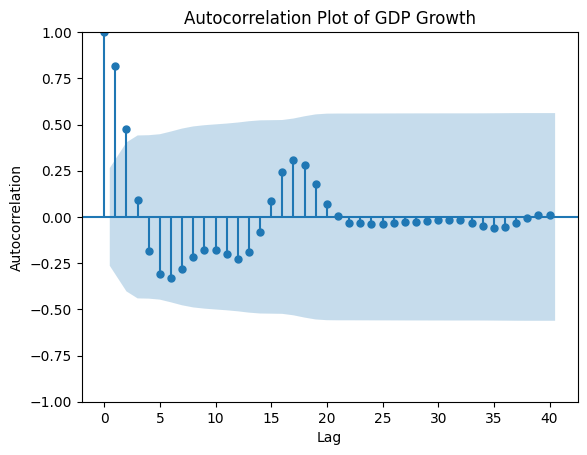

In [391]:
# 3. Autocorrelation Plot of GDP (Macroeconomic Indicator)
plt.figure(figsize=(10, 6))
plot_acf(df['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]'], lags=40)
plt.title('Autocorrelation Plot of GDP Growth')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()



<Figure size 1000x600 with 0 Axes>

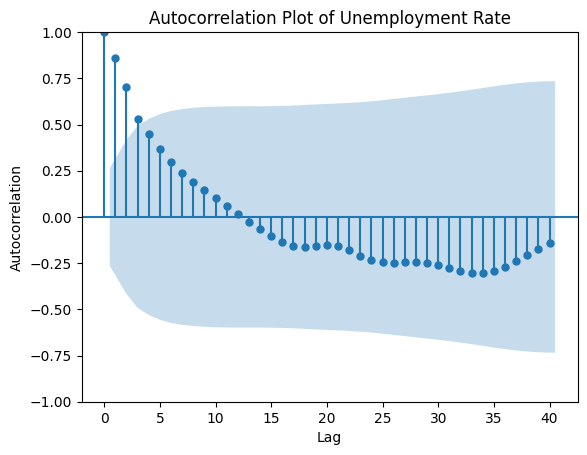

In [392]:
# 4. Autocorrelation Plot of Unemployment Rate (Macroeconomic Indicator)
plt.figure(figsize=(10, 6))
plot_acf(df['Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]'], lags=40)
plt.title('Autocorrelation Plot of Unemployment Rate')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

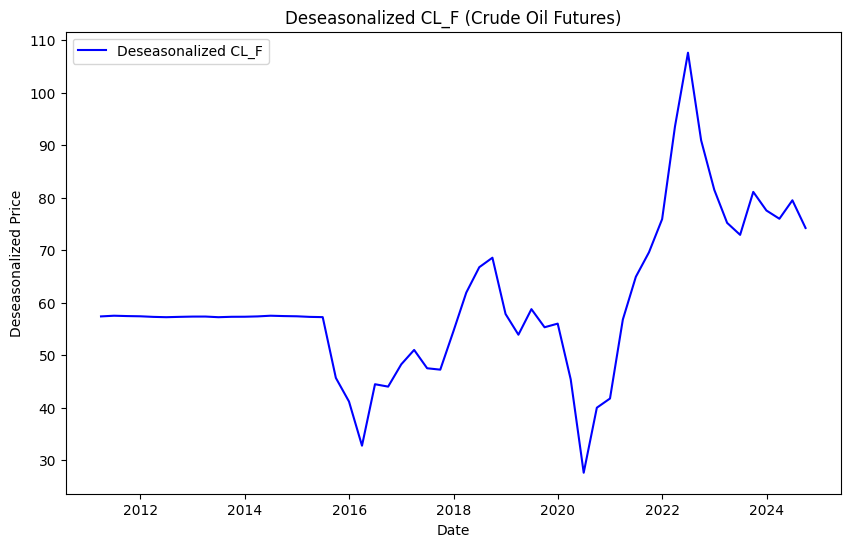

In [393]:
result_mul_cl = seasonal_decompose(df['CL_F'], model='multiplicative', period=12)
deseason_cl = df['CL_F'] - result_mul_cl.seasonal
plt.figure(figsize=(10, 6))
plt.plot(deseason_cl, label='Deseasonalized CL_F', color='blue')
plt.title('Deseasonalized CL_F (Crude Oil Futures)')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Price')
plt.legend()
plt.show()


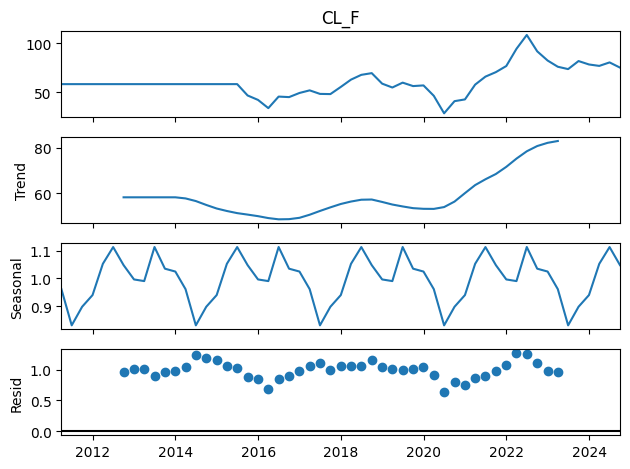

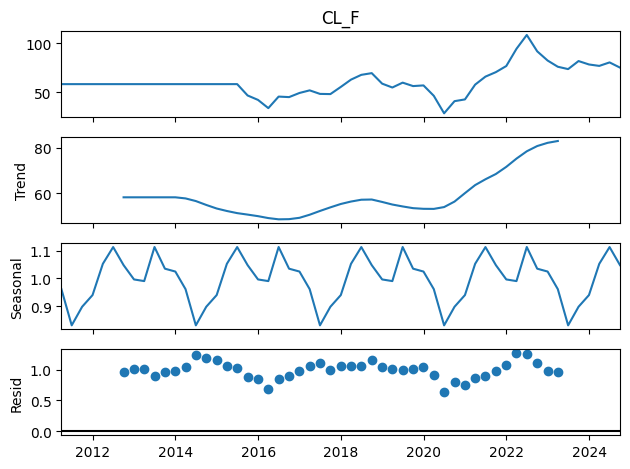

In [395]:
result_mul_cl.plot()

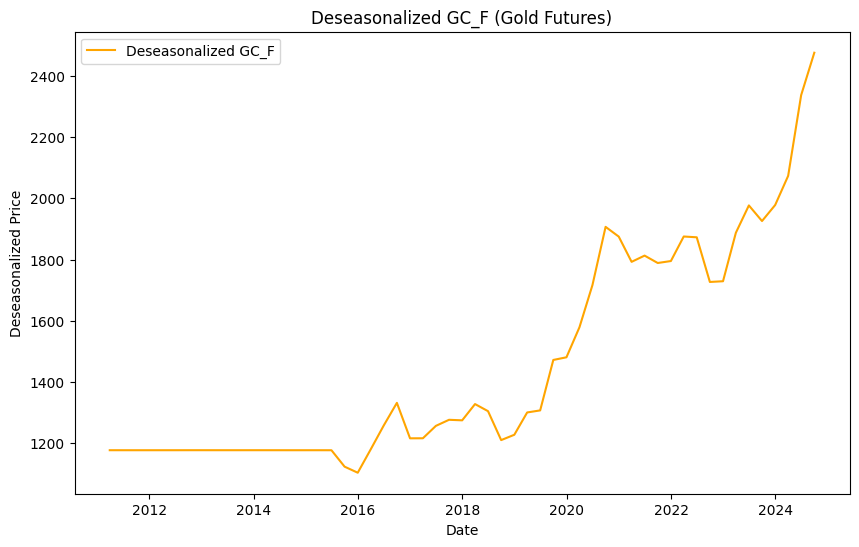

In [394]:
# 6. Deseasonalized Plot of GC_F (Futures Indicator)
result_mul_gc = seasonal_decompose(df['GC_F'], model='multiplicative', period=12)
deseason_gc = df['GC_F'] - result_mul_gc.seasonal
plt.figure(figsize=(10, 6))
plt.plot(deseason_gc, label='Deseasonalized GC_F', color='orange')
plt.title('Deseasonalized GC_F (Gold Futures)')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Price')
plt.legend()
plt.show()

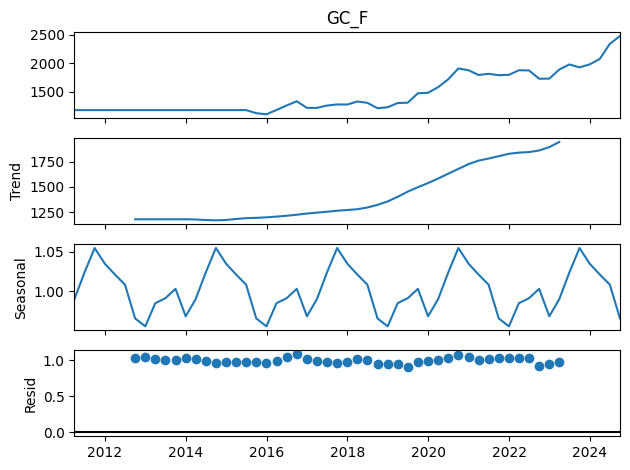

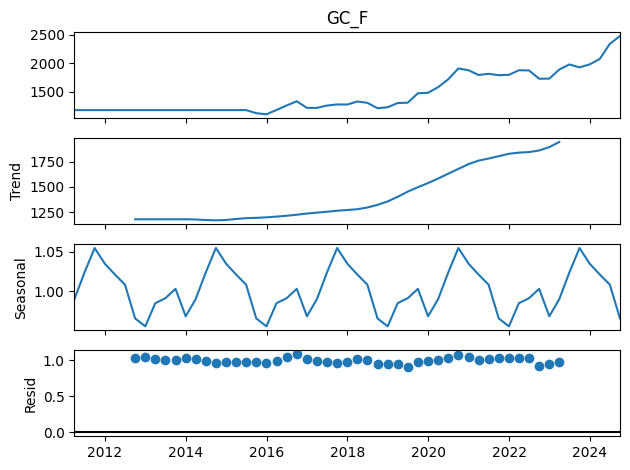

In [396]:
result_mul_gc.plot()

In [397]:
from statsmodels.tsa.stattools import adfuller

In [410]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series, column_name):
    print(f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')

    # Output test statistics
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', 'Lags Used', 'No. of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    # Check for stationarity
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
        return True  # Indicate that data is stationary
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        return False  # Indicate that data is non-stationary

def check_stationarity(df, columns):
    modification_count = {}
    stationary_candidates = []

    for column in columns:
        is_stationary = False
        while not is_stationary:
            # Perform the ADF test
            is_stationary = Augmented_Dickey_Fuller_Test_func(df[column].dropna(), column)
            if not is_stationary:
                # If non-stationary, apply differencing
                df[column] = df[column].diff().dropna()  # Differencing the series
                modification_count[column] = modification_count.get(column, 0) + 1  # Count modifications
                print(f"{column} has been modified {modification_count[column]} time(s).")

        # If stationary, add to the candidates list
        stationary_candidates.append(column)

    return df, modification_count, stationary_candidates

# Example usage:
# df is your DataFrame and columns is a list of column names you want to check.
# df_stationary, modifications, candidates = check_stationarity(df, ['column1', 'column2'])


In [411]:
df_mod,modification_count, suitable_candidates = check_stationarity(data, data.columns)

Results of Dickey-Fuller Test for column: CNXMETAL
Test Statistics             -4.747672
p-value                      0.000068
Lags Used                    7.000000
No. of Observations Used    47.000000
Critical Value (1%)         -3.577848
Critical Value (5%)         -2.925338
Critical Value (10%)        -2.600774
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary
Results of Dickey-Fuller Test for column: CNXENERGY
Test Statistics             -4.951455
p-value                      0.000028
Lags Used                    7.000000
No. of Observations Used    47.000000
Critical Value (1%)         -3.577848
Critical Value (5%)         -2.925338
Critical Value (10%)        -2.600774
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary
Results of Dickey-Fuller Test for column: NSEMDCP50
Test Statistics             -3.447783
p-value                      0.009434
Lags Used                   11.000000
No. of Observations Used    43.000000
Criti

In [412]:
print("\nModification Count per Column:")
print(modification_count)

print("\nSuitable Candidates (Stationary Columns):")
print(suitable_candidates)



Modification Count per Column:
{'NIFTY_MIDCAP_100_NS': 1}

Suitable Candidates (Stationary Columns):
['CNXMETAL', 'CNXENERGY', 'NSEMDCP50', 'CNXFMCG', 'CNXINFRA', 'NIFTY_MIDCAP_100_NS', 'NSMIDCP', 'NSEI', 'NSEBANK', 'CNXIT', 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_x', 'Lending interest rate (%) [FR.INR.LEND]', 'Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]', 'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]', 'Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]', 'Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]', 'Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]', 'Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]', 'Total reserves (% of total external debt) [FI.RES.TOTL.DT.ZS]', 'Total reserves minus gold (current US$) [FI.RES.XGLD.CD]', 'Net lending (+) / net borrowing (-) (% of 

In [404]:
data.isnull().sum()/len(data)

,0
CNXMETAL,0.036364
CNXENERGY,0.036364
NSEMDCP50,0.054545
CNXFMCG,0.018182
CNXINFRA,0.018182
NIFTY_MIDCAP_100_NS,0.018182
NSMIDCP,0.036364
NSEI,0.018182
NSEBANK,0.018182
CNXIT,0.018182


In [407]:
data = data.bfill()

In [408]:
data.isnull().sum()/len(data)

,0
CNXMETAL,0.0
CNXENERGY,0.0
NSEMDCP50,0.0
CNXFMCG,0.0
CNXINFRA,0.0
NIFTY_MIDCAP_100_NS,0.0
NSMIDCP,0.0
NSEI,0.0
NSEBANK,0.0
CNXIT,0.0


In [426]:
data = df

In [427]:
def check_stationarity(data):
    result = adfuller(data)
    return result[1]  # p-value

# Assuming 'data' is your DataFrame
# Select only int and float columns
numeric_data = data.select_dtypes(include=['int', 'float'])

# Check stationarity for each numeric column
for col in numeric_data.columns:
    p_value = check_stationarity(numeric_data[col])
    print(f'{col}: p-value = {p_value:.5f}')

CNXMETAL: p-value = 0.99707
CNXENERGY: p-value = 0.99860
NSEMDCP50: p-value = 1.00000
CNXFMCG: p-value = 0.99909
CNXINFRA: p-value = 0.99903
NIFTY_MIDCAP_100_NS: p-value = 0.99879
NSMIDCP: p-value = 0.99634
NSEI: p-value = 0.97965
NSEBANK: p-value = 0.99078
CNXIT: p-value = 0.98830
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_x: p-value = 0.88301
Lending interest rate (%) [FR.INR.LEND]: p-value = 0.97681
Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]: p-value = 0.97415
Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]: p-value = 1.00000
Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]: p-value = 0.79928
Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]: p-value = 0.32351
Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]: p-value = 0.00259
Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]: p

In [418]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [428]:
target_variable = 'CNXMETAL'
predictor_variables = ['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
                       'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_y',
                       'Lending interest rate (%) [FR.INR.LEND]']

# Combine Y and X into a new DataFrame
data_var = combined_df[[target_variable] + predictor_variables].dropna()

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   CNXMETAL                                                  56 non-null     float64
 1   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                 56 non-null     float64
 2   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_y  56 non-null     float64
 3   Lending interest rate (%) [FR.INR.LEND]                   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [430]:
model = VAR(data_var)
results = model.fit(maxlags=5, ic='aic')  # AIC for lag selection
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Oct, 2024
Time:                     19:37:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.06463
Nobs:                     51.0000    HQIC:                   7.09867
Log likelihood:          -355.475    FPE:                    441.665
AIC:                      5.88280    Det(Omega_mle):         111.184
--------------------------------------------------------------------
Results for equation CNXMETAL
                                                                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------------
const                                                            5453.053331      2441.131876            2.234           0.025


In [431]:
# Measurement statistics
def calculate_statistics(results):
    aic = results.aic
    bic = results.bic
    fpe = results.fpe
    return aic, bic, fpe

aic, bic, fpe = calculate_statistics(results)
print(f'AIC: {aic}, BIC: {bic}, FPE: {fpe}')


AIC: 5.88279546681487, BIC: 9.064625920713759, FPE: 441.6654827451699


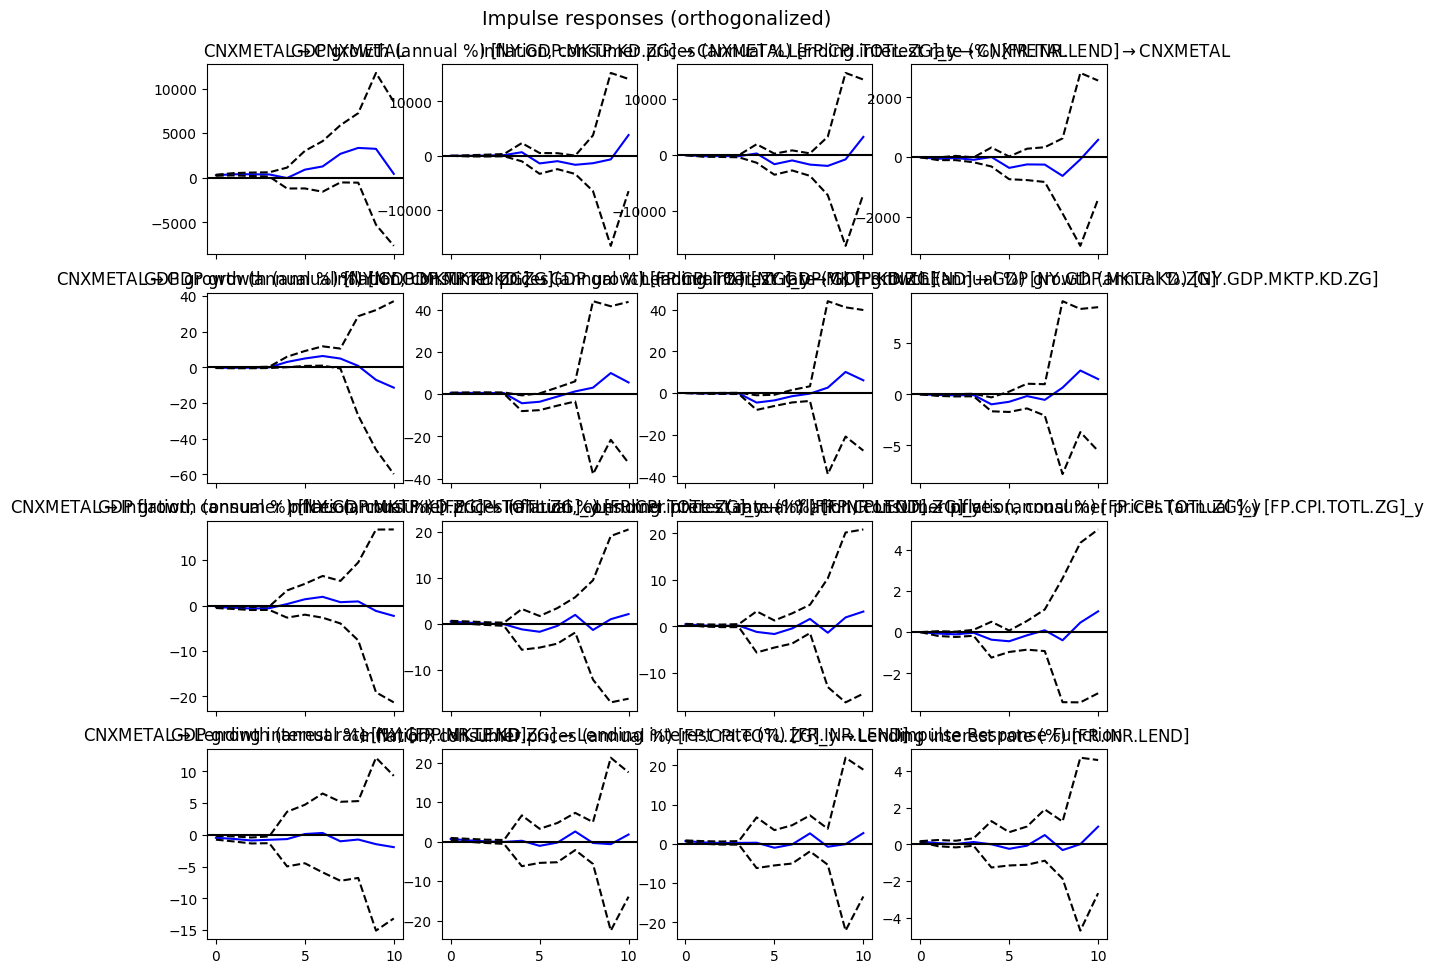

In [432]:
irf = results.irf(10)
irf.plot(orth=True)
plt.title('Impulse Response Function')
plt.show()


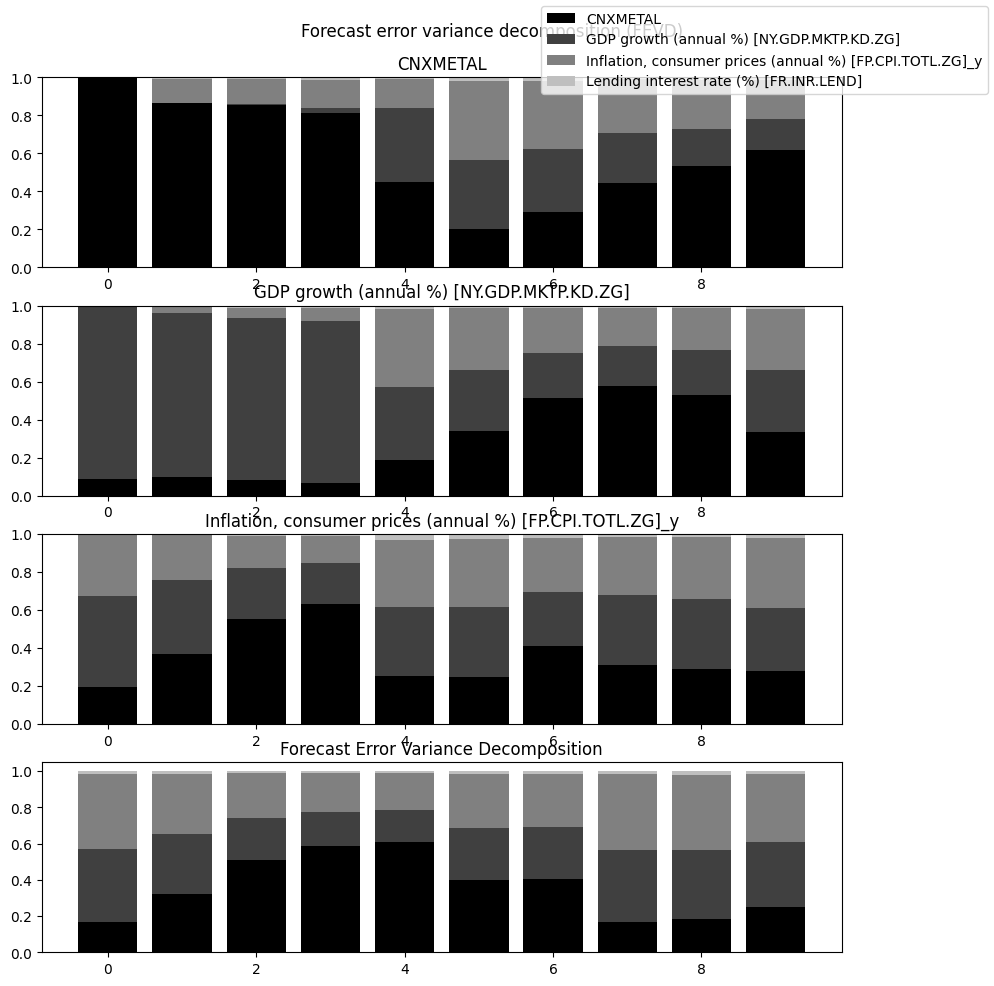

In [433]:
fevd = results.fevd(10)
fevd.plot()
plt.title('Forecast Error Variance Decomposition')
plt.show()


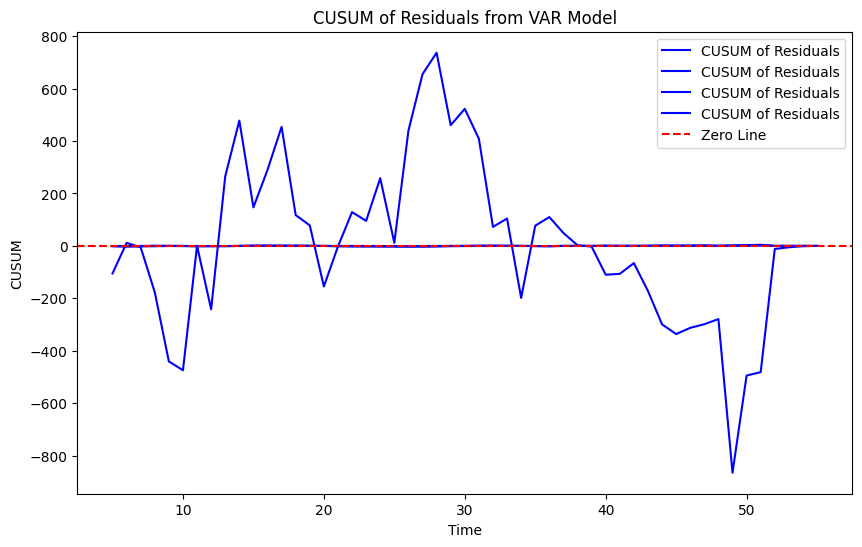

In [435]:
# Calculate the residuals from the VAR model
residuals = results.resid

# Calculate CUSUM
cusum = np.cumsum(residuals)

# Plot CUSUM
plt.figure(figsize=(10, 6))
plt.plot(cusum, label='CUSUM of Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('CUSUM of Residuals from VAR Model')
plt.xlabel('Time')
plt.ylabel('CUSUM')
plt.legend()
plt.show()


Arima and sarima

In [436]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [439]:
combined_df = df.copy()

In [472]:
if 'NIFTY_Returns' not in combined_df.columns:
    combined_df['NIFTY_Returns'] = combined_df['NSEI'].pct_change().dropna()

# Prepare the data
Y = combined_df['NIFTY_Returns'].dropna()
X = combined_df[['Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_x',
                  'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
                  'Lending interest rate (%) [FR.INR.LEND]',
                  'Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]']].dropna()

In [473]:
data_y = pd.concat([Y, X], axis=1).dropna()



In [450]:
combined_df.isnull().sum()/len(combined_df)

,0
CNXMETAL,0.0
CNXENERGY,0.0
NSEMDCP50,0.0
CNXFMCG,0.0
CNXINFRA,0.0
NIFTY_MIDCAP_100_NS,0.0
NSMIDCP,0.0
NSEI,0.0
NSEBANK,0.0
CNXIT,0.0


In [471]:
combined_df['NIFTY_Returns'] =  combined_df['NIFTY_Returns'].bfill()


In [462]:
# Option 1: Replace infinite values with NaN and drop them
combined_df['NIFTY_Returns'].replace([np.inf, -np.inf], np.nan, inplace=True)

<ipython-input-462-02b03c0fbda0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['NIFTY_Returns'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [463]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    return result[1]  # p-value

# Check stationarity for NIFTY Returns
p_value = check_stationarity(combined_df['NIFTY_Returns'])
if p_value > 0.05:
    print("Series is non-stationary, differencing is required.")
    data['NIFTY_Returns_diff'] = data['NIFTY_Returns'].diff().dropna()
else:
    print("Series is stationary.")

# Check the differenced series if differencing was performed
if 'NIFTY_Returns_diff' in data.columns:
    p_value_diff = check_stationarity(data['NIFTY_Returns_diff'].dropna())

ADF Statistic: -6.123911261148038
p-value: 8.721610950956665e-08
Critical Values:
   1%: -3.55770911573439
   5%: -2.9167703434435808
   10%: -2.59622219478738
Series is stationary.


In [470]:
combined_df['NIFTY_Returns'] =  combined_df['NIFTY_Returns'].diff()

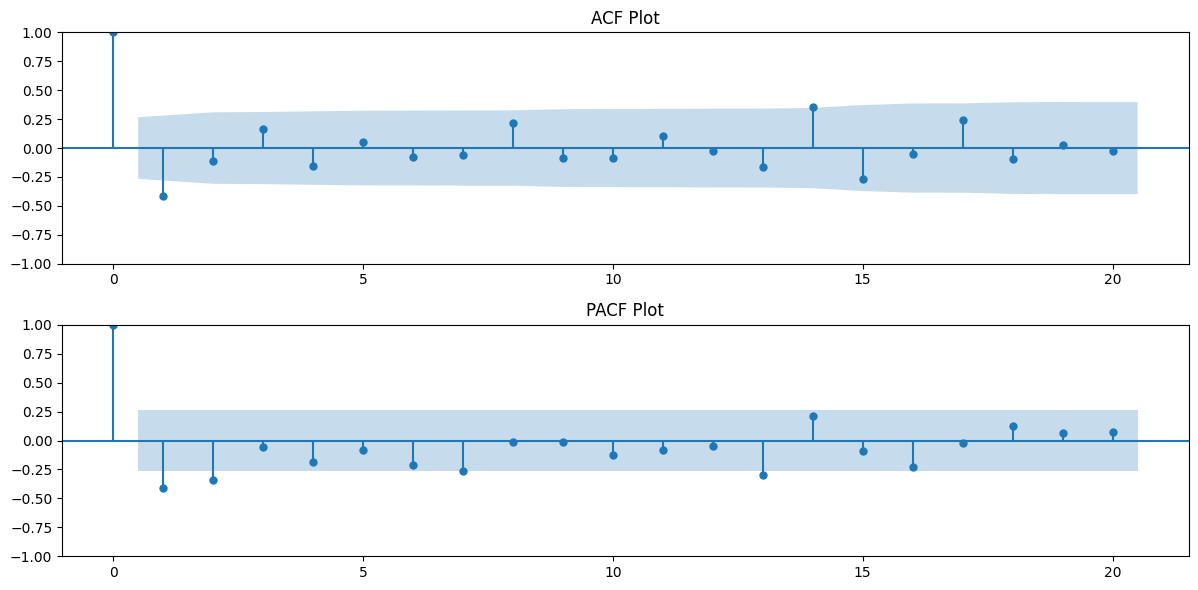

In [466]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(combined_df['NIFTY_Returns'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('ACF Plot')
plt.subplot(212)
plot_pacf(combined_df['NIFTY_Returns'].diff().dropna(), ax=plt.gca(), lags=20)
plt.title('PACF Plot')
plt.tight_layout()
plt.show()


In [481]:
model = ARIMA(data_y['NIFTY_Returns'].dropna(), order=(2, 1, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          NIFTY_Returns   No. Observations:                   55
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  66.513
Date:                Tue, 15 Oct 2024   AIC                           -123.027
Time:                        20:08:33   BIC                           -113.082
Sample:                    03-31-2011   HQIC                          -119.191
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1980      0.255      0.776      0.438      -0.302       0.698
ar.L2          0.0707      0.189      0.374      0.708      -0.299       0.441
ma.L1         -1.7834      0.242     -7.361      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [476]:
forecast = results.get_forecast(steps=5)  # Forecast the next 5 periods
forecast_index = pd.date_range(start=combined_df.index[-1], periods=6, freq='Q')[1:]
forecast_values = forecast.predicted_mean

<ipython-input-476-a5f2fc1b3e43>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=combined_df.index[-1], periods=6, freq='Q')[1:]


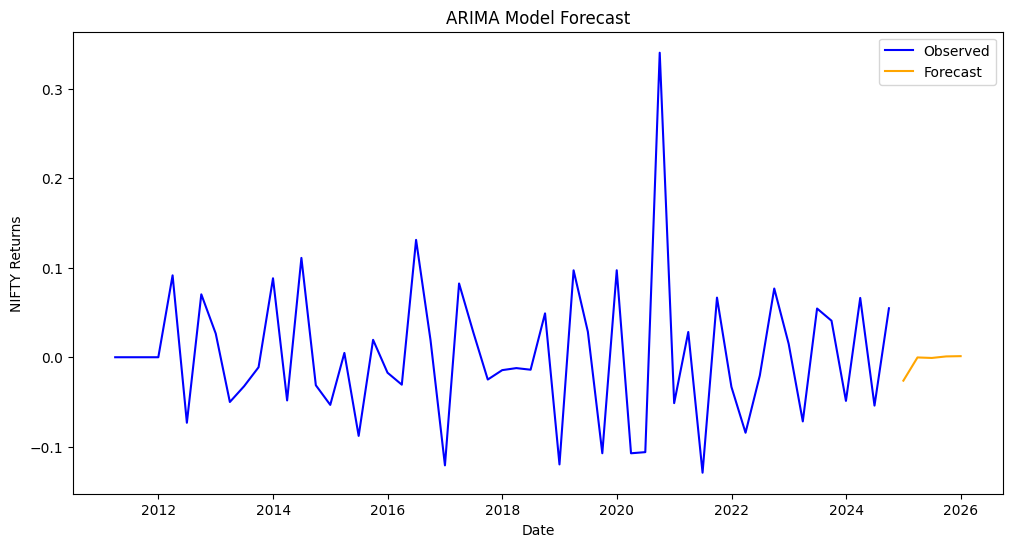

In [478]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['NIFTY_Returns'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('NIFTY Returns')
plt.legend()
plt.show()

In [483]:
p, d, q = 1, 1, 1  # Example non-seasonal orders
P, D, Q, s = 1, 0, 1, 4  # Example seasonal orders

# Fit SARIMAX model with exogenous variables
model_sarimax = SARIMAX(
    data_y['NIFTY_Returns'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    exog=data_y[
        ['Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_x',
         'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
         'Lending interest rate (%) [FR.INR.LEND]',
         'Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]']
    ]
)

In [484]:
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())



                                     SARIMAX Results                                     
Dep. Variable:                     NIFTY_Returns   No. Observations:                   55
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 4)   Log Likelihood                  61.647
Date:                           Tue, 15 Oct 2024   AIC                           -105.294
Time:                                   20:09:51   BIC                            -87.393
Sample:                               03-31-2011   HQIC                           -98.390
                                    - 09-30-2024                                         
Covariance Type:                             opg                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Inflation, consumer prices (an

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [485]:

# Forecasting with SARIMAX
forecast_steps = 5
exog_forecast = data_y.iloc[-forecast_steps:, 1:]  # Last 5 rows of exogenous variables

forecast_sarimax = results_sarimax.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values_sarimax = forecast_sarimax.predicted_mean

# Create forecast index
forecast_index_sarimax = pd.date_range(start=data.index[-1], periods=6, freq='Q')[1:]

<ipython-input-485-a5fe7efcdf7a>:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index_sarimax = pd.date_range(start=data.index[-1], periods=6, freq='Q')[1:]


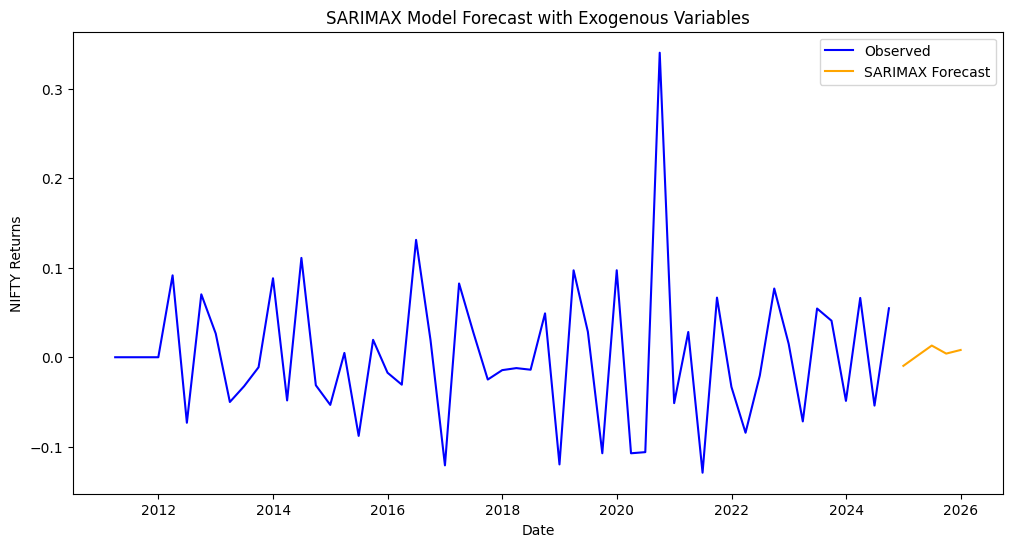

In [487]:

# Plot SARIMAX Forecast
plt.figure(figsize=(12, 6))
plt.plot(data_y['NIFTY_Returns'], label='Observed', color='blue')
plt.plot(forecast_index_sarimax, forecast_values_sarimax, label='SARIMAX Forecast', color='orange')
plt.title('SARIMAX Model Forecast with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('NIFTY Returns')
plt.legend()
plt.show()

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2011-03-31 to 2024-09-30
Freq: QE-DEC
Data columns (total 39 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   CNXMETAL                                                                                               55 non-null     float64
 1   CNXENERGY                                                                                              55 non-null     float64
 2   NSEMDCP50                                                                                              55 non-null     float64
 3   CNXFMCG                                                                                                55 non-null     float64
 4   CNXINFRA                                                           

In [489]:
df.head()

,CNXMETAL,CNXENERGY,NSEMDCP50,CNXFMCG,CNXINFRA,NIFTY_MIDCAP_100_NS,NSMIDCP,NSEI,NSEBANK,CNXIT,...,BZ_F,GC_F,ALI_F,ZNC_F,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]_y",Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Year,Quarter_Num,Year_Quarter
Quarter,,,,,,,,,,,,,,,,,,,,,
2011-03-31,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.009998,1178.5,1813.0,2072.0,3.327133,4.822396,49.840926,2011,1,2011-Q1
2011-06-30,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.009998,1178.5,1813.0,2072.0,3.172628,4.548129,49.700854,2011,2,2011-Q2
2011-09-30,3393.294548,7927.994454,2257.932723,10105.83707,2845.795681,7557.432744,10431.923450,5163.445059,10089.295050,5692.996938,...,62.009998,1178.5,1813.0,2072.0,3.018124,4.273862,49.560782,2011,3,2011-Q3
2011-12-31,2835.462291,7707.670654,1980.391302,10264.30602,2464.573903,6790.347821,9369.223378,4957.533707,9038.542342,6035.702180,...,62.009998,1178.5,1813.0,2072.0,2.863620,3.999594,49.420710,2011,4,2011-Q4
2012-03-31,3061.690094,7775.570307,2183.143950,10561.58404,2520.238461,7285.302139,9921.096122,5213.844496,9965.054956,6373.279125,...,62.009998,1178.5,1813.0,2072.0,2.709115,3.725327,49.280638,2012,1,2012-Q1


In [490]:
df.drop(columns=['Year','Quarter_Num','Year_Quarter'],inplace=True)

In [491]:
data = df

In [492]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Lagging Features
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged_df = lagged_df.join(df.shift(lag).add_suffix(f'_lag{lag}'))
    return lagged_df.dropna()

# Generate lagged features (e.g., 4 previous quarters)
lags = 4
data_lagged = create_lagged_features(data, lags)

# Step 2: Train-Test Split
X = data_lagged.drop(columns=['NSEI'])  # Predicting NSEI as an example
y = data_lagged['NSEI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Forecasting the next 4 quarters
y_pred = rf_model.predict(X_test)

# Step 5: Model Evaluation (using RMSE)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Square Error (RMSE): {rmse}")

# Show the forecast for the last 4 quarters
print("\nPredicted values for the next 4 quarters:\n", y_pred[-4:])



Root Mean Square Error (RMSE): 4938.595571786905

Predicted values for the next 4 quarters:
 [15607.6290463  15368.9929961  15167.0267043  14556.28383952]


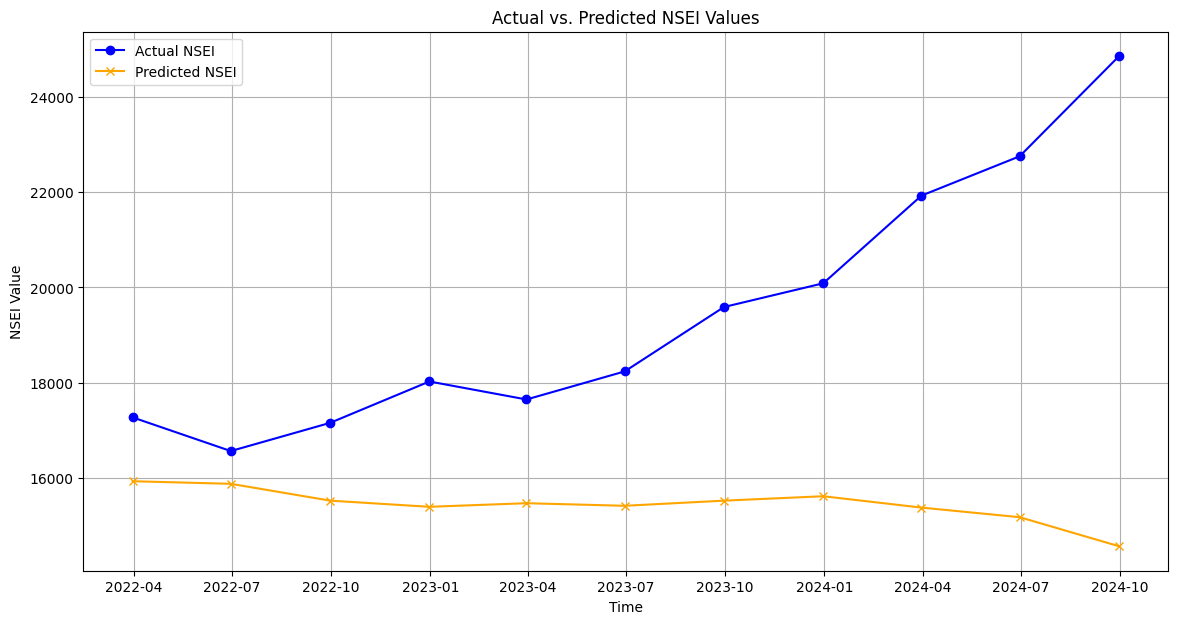

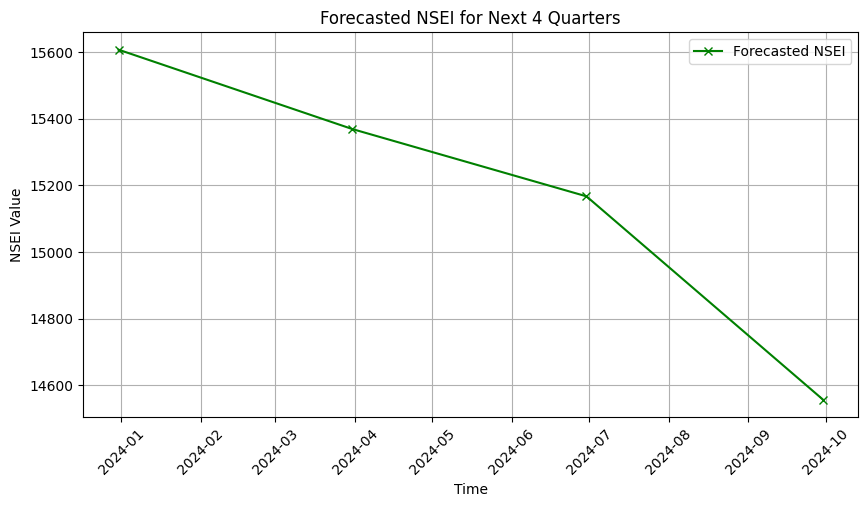

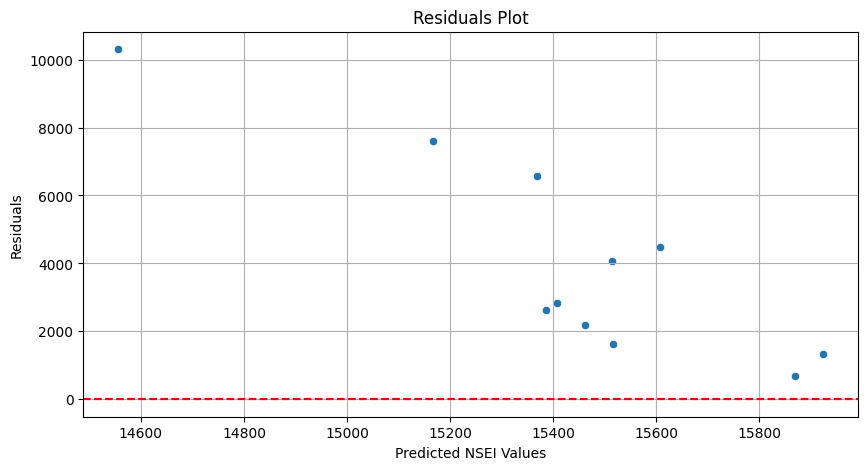

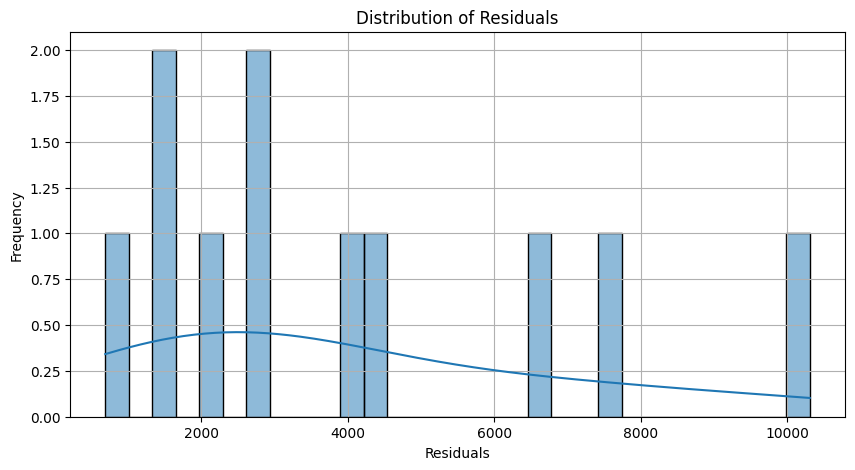

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot Actual vs. Predicted Values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual NSEI', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted NSEI', color='orange', marker='x')
plt.title('Actual vs. Predicted NSEI Values')
plt.xlabel('Time')
plt.ylabel('NSEI Value')
plt.legend()
plt.grid()
plt.show()

# Step 2: Plot Predictions for the Last 4 Quarters
plt.figure(figsize=(10, 5))
future_quarters = y_test.index[-4:]  # Assuming the last four indices correspond to the next four quarters
plt.plot(future_quarters, y_pred[-4:], label='Forecasted NSEI', color='green', marker='x')
plt.title('Forecasted NSEI for Next 4 Quarters')
plt.xlabel('Time')
plt.ylabel('NSEI Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Step 3: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted NSEI Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Step 4: Distribution of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [494]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.tsa.api import VAR, DynamicFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Load sector and macro data (Example: Banking, IT, Pharma, Macro Data)
Allsector_data = pd.read_csv('/content/microeconomics_nifty_sector_Quaterly.csv', parse_dates=['Date'], index_col='Date')
macro_data = pd.read_csv('/content/macro_economics_India_diffparams_Quaterlty.csv', parse_dates=['Time'], index_col='Time')

print(Allsector_data.head())
print(macro_data.head())

# # Step 1: Resample data to align by quarters
# sector_data = sector_data.resample('Q').mean()
# macro_data = macro_data.resample('Q').mean()

# # Step 2: Handle missing quarters by filling with NaN and forward fill
# combined_data = pd.concat([sector_data, macro_data], axis=1)
# combined_data = combined_data.fillna(method='ffill')

# # Step 3: Exploratory Data Analysis (Correlation Matrix and Heatmap)
# plt.figure(figsize=(12, 8))
# sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm', center=0)
# plt.title("Correlation Matrix of Sectors and Macro Variables")
# plt.show()

# # Step 4: Principal Component Analysis (PCA) to find shared trends
# pca = PCA(n_components=2)  # Choose 2 components for visualization
# pca_result = pca.fit_transform(combined_data)

# print(f"Explained Variance by Components: {pca.explained_variance_ratio_}")
# pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=combined_data.index)

# # Plot PCA components
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=sector_data.mean(axis=1), palette='viridis')
# plt.title("PCA of Sectors and Macro Variables")
# plt.show()

# # Step 5: K-Means Clustering to identify clusters based on macro sensitivity
# kmeans = KMeans(n_clusters=3, random_state=42).fit(combined_data)
# combined_data['Cluster'] = kmeans.labels_

# # Visualize the clusters
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df.join(combined_data['Cluster']), palette='Set2')
# plt.title("K-Means Clustering on PCA Components")
# plt.show()

# # Step 6: Dynamic Factor Model to identify latent trends
# dfm = DynamicFactor(combined_data, k_factors=2, factor_order=1)
# dfm_result = dfm.fit()

# print(dfm_result.summary())

# # Plot the factors over time
# dfm_result.plot_coefficients_of_determination(figsize=(8, 4))
# plt.show()

# # Step 7: VAR Model for Forecasting Sector Trends
# var_model = VAR(combined_data.dropna())
# var_result = var_model.fit(3)  # Choose lag order 3

# # Forecast next 4 quarters
# forecast = var_result.forecast(combined_data.values[-3:], steps=4)
# forecast_index = pd.date_range(start=combined_data.index[-1], periods=5, freq='Q')[1:]
# forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=combined_data.columns)

# print("VAR Forecast:")
# print(forecast_df)

# # Plot the forecast
# forecast_df.plot(figsize=(10, 6), title="Forecast of Sectors and Macro Variables")
# plt.show()


               CNXMETAL    CNXENERGY    NSEMDCP50      CNXFMCG     CNXINFRA  \
Date                                                                          
2011-09-30  3393.294548  7927.994454  2257.932723  10105.83707  2845.795681   
2011-12-31  2835.462291  7707.670654  1980.391302  10264.30602  2464.573903   
2012-03-31  3061.690094  7775.570307  2183.143950  10561.58404  2520.238461   
2012-06-30  2826.062645  7277.729095  2116.720861  11922.10165  2325.034056   
2012-09-30  2751.469002  7718.733669  2102.759240  13194.22179  2374.679343   

            NIFTY_MIDCAP_100_NS       NSMIDCP         NSEI       NSEBANK  \
Date                                                                       
2011-09-30          7557.432744  10431.923450  5163.445059  10089.295050   
2011-12-31          6790.347821   9369.223378  4957.533707   9038.542342   
2012-03-31          7285.302139   9921.096122  5213.844496   9965.054956   
2012-06-30          7223.459875   9942.879228  5101.373068   9906.

<ipython-input-494-557d7a40d1a8>:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Allsector_data = pd.read_csv('/content/microeconomics_nifty_sector_Quaterly.csv', parse_dates=['Date'], index_col='Date')


<ipython-input-495-e6bba95838e9>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Allsector_data = pd.read_csv('/content/microeconomics_nifty_sector_Quaterly.csv',
<ipython-input-495-e6bba95838e9>:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  macro_data = macro_data.resample('Q').mean()
<ipython-input-495-e6bba95838e9>:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sector_data = Allsector_data.resample('Q').mean()


CNXMETAL               0
CNXENERGY              0
NSEMDCP50              0
CNXFMCG                0
CNXINFRA               0
NIFTY_MIDCAP_100_NS    0
NSMIDCP                0
NSEI                   0
NSEBANK                0
CNXIT                  0
dtype: int64

Cyclical Patterns for CNXMETAL:


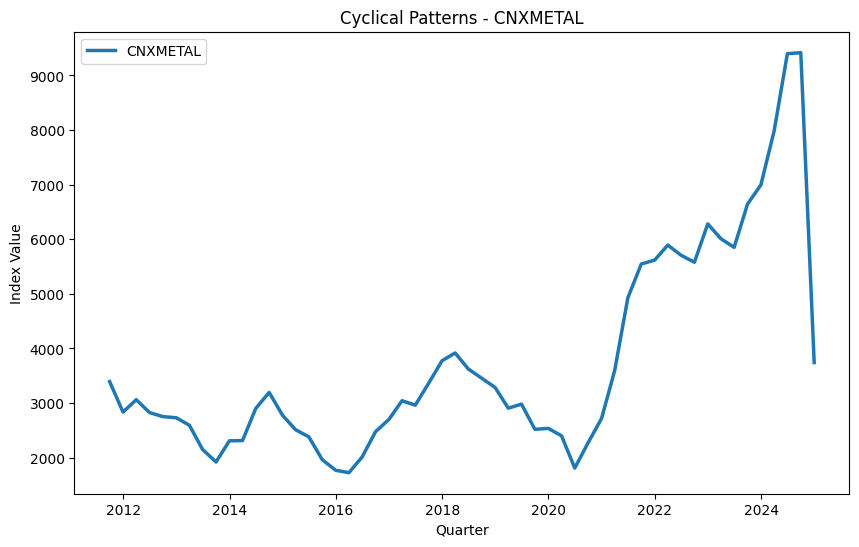


Cyclical Patterns for CNXENERGY:


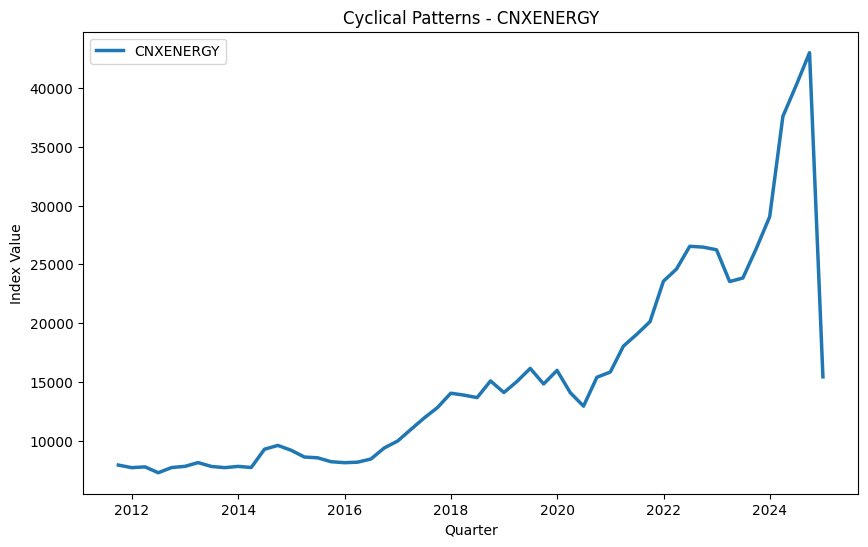


Cyclical Patterns for NSEMDCP50:


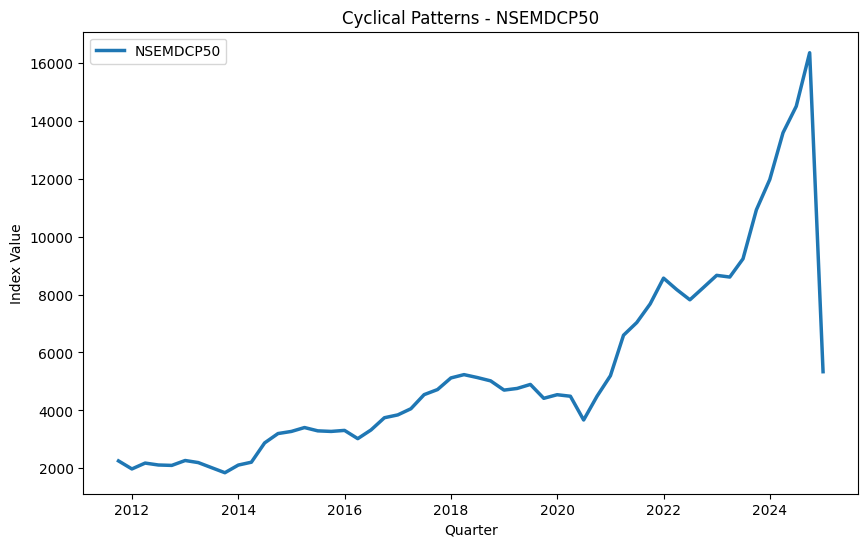


Cyclical Patterns for CNXFMCG:


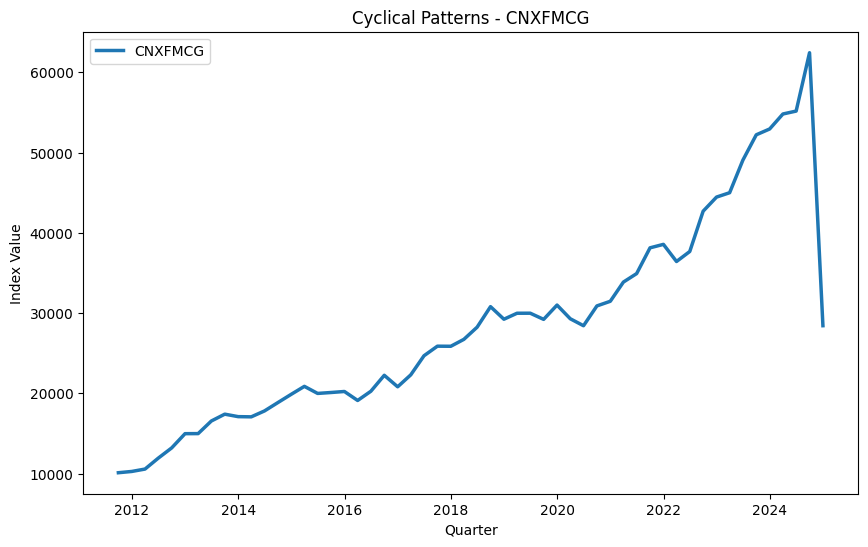


Cyclical Patterns for CNXINFRA:


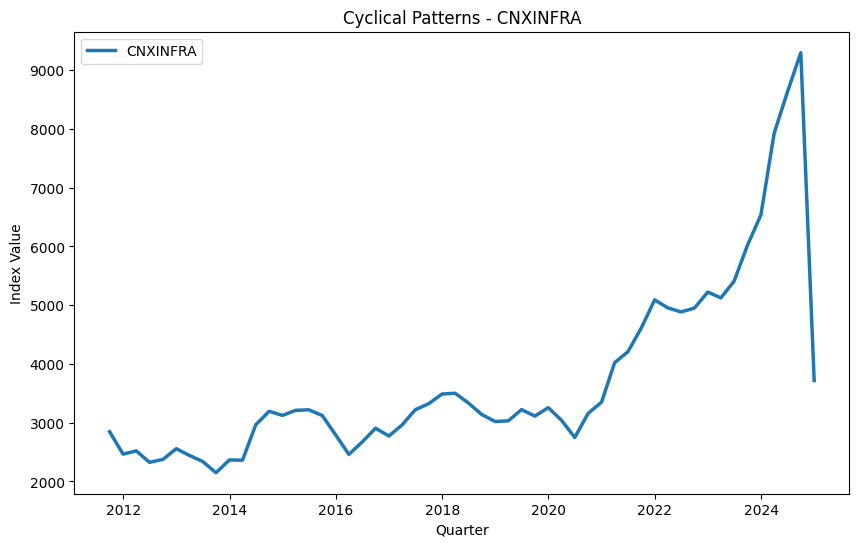


Cyclical Patterns for NIFTY_MIDCAP_100_NS:


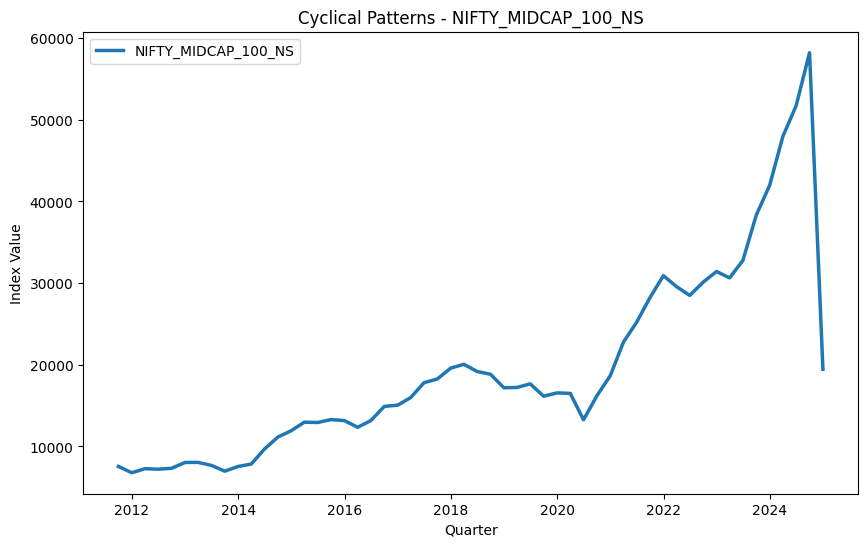


Cyclical Patterns for NSMIDCP:


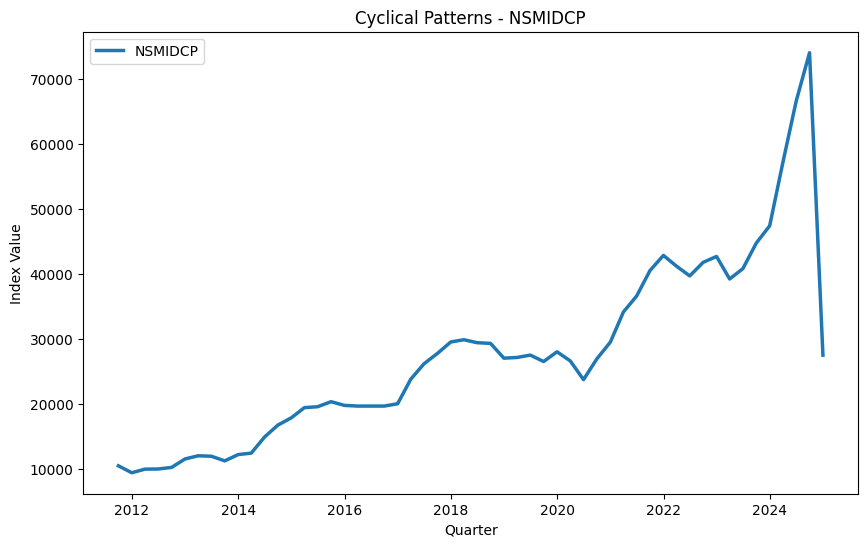


Cyclical Patterns for NSEI:


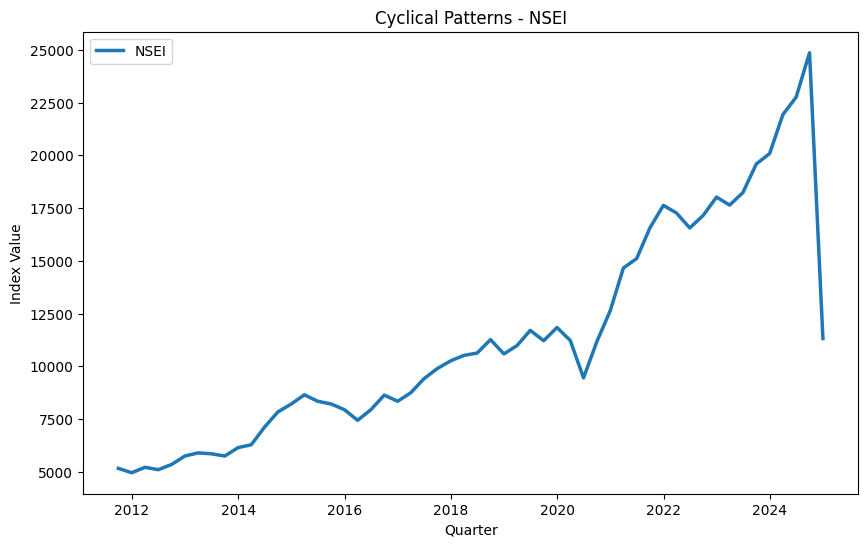


Cyclical Patterns for NSEBANK:


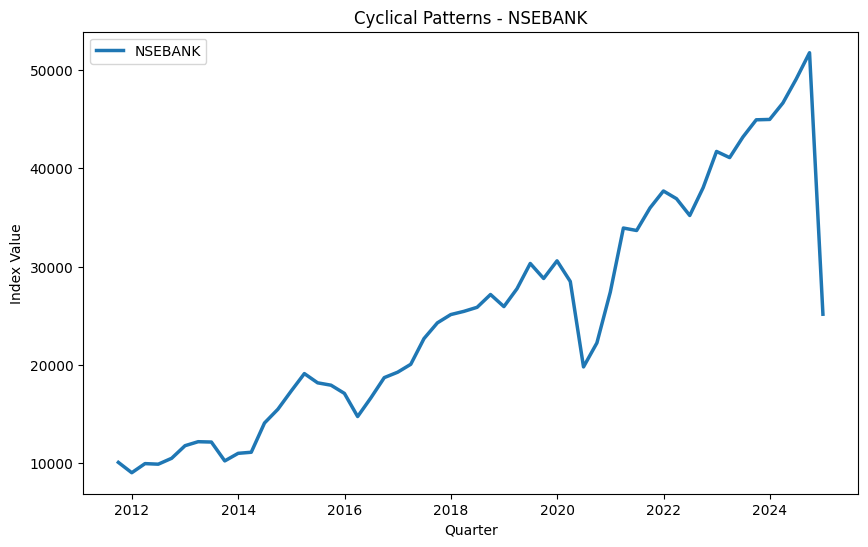


Cyclical Patterns for CNXIT:


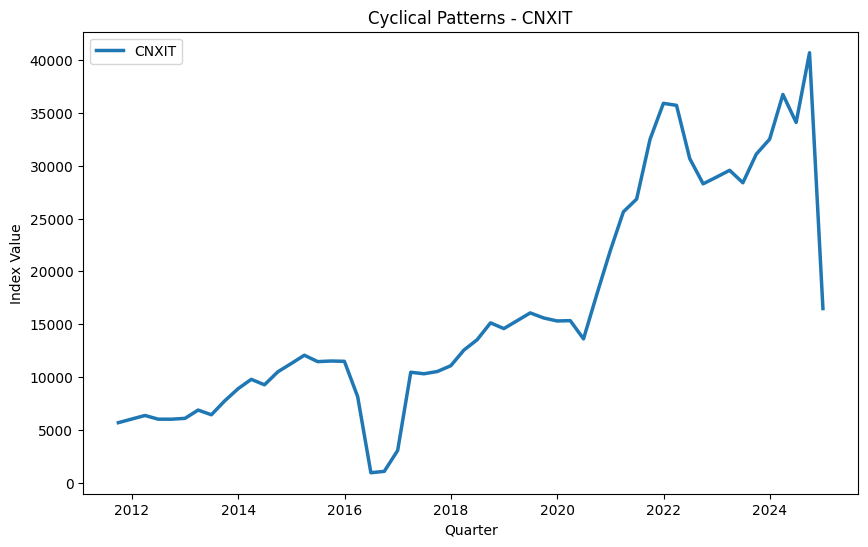

Correlations:
 CNXMETAL               0.597008
CNXENERGY              0.879862
NSEMDCP50              0.872124
CNXFMCG                0.928856
CNXINFRA               0.778852
NIFTY_MIDCAP_100_NS    0.859187
NSMIDCP                0.895324
NSEI                   0.913620
NSEBANK                0.944394
CNXIT                  0.842506
dtype: float64


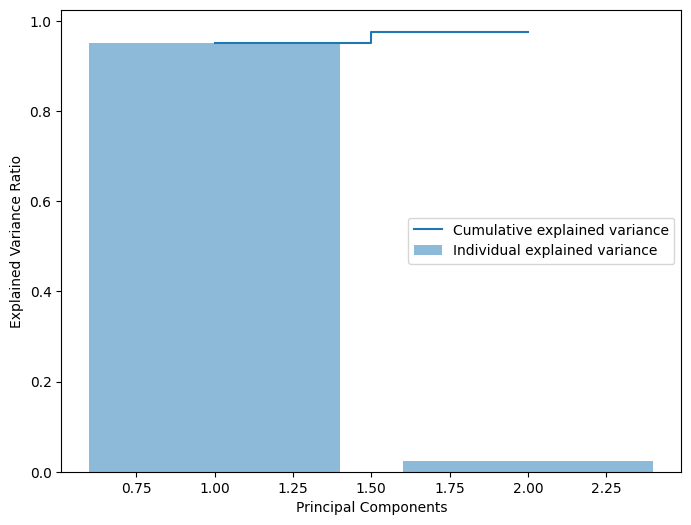

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Factor Loadings:
 loading.f1.CNXMETAL               0.426171
loading.f1.CNXENERGY              0.443634
loading.f1.NSEMDCP50              0.463555
loading.f1.CNXFMCG                0.364833
loading.f1.CNXINFRA               0.503586
loading.f1.NIFTY_MIDCAP_100_NS    0.464186
loading.f1.NSMIDCP                0.462594
loading.f1.NSEI                   0.374417
loading.f1.NSEBANK                0.326251
loading.f1.CNXIT                  0.330434
dtype: float64


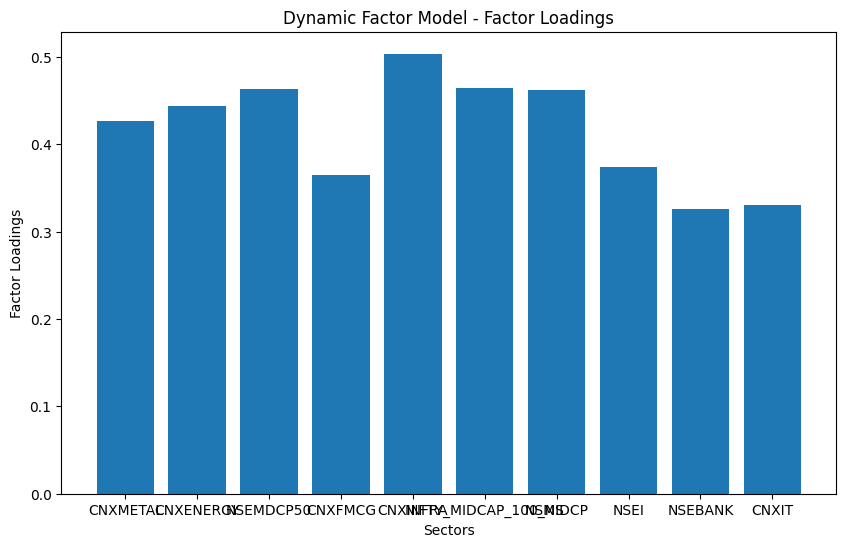

                                                                                Statespace Model Results                                                                               
Dep. Variable:     ['CNXMETAL', 'CNXENERGY', 'NSEMDCP50', 'CNXFMCG', 'CNXINFRA', 'NIFTY_MIDCAP_100_NS', 'NSMIDCP', 'NSEI', 'NSEBANK', 'CNXIT']   No. Observations:                   54
Model:                                                                                                       DynamicFactor(factors=1, order=1)   Log Likelihood                 393.985
                                                                                                                                + AR(1) errors   AIC                           -725.971
Date:                                                                                                                         Tue, 15 Oct 2024   BIC                           -664.312
Time:                                                                           

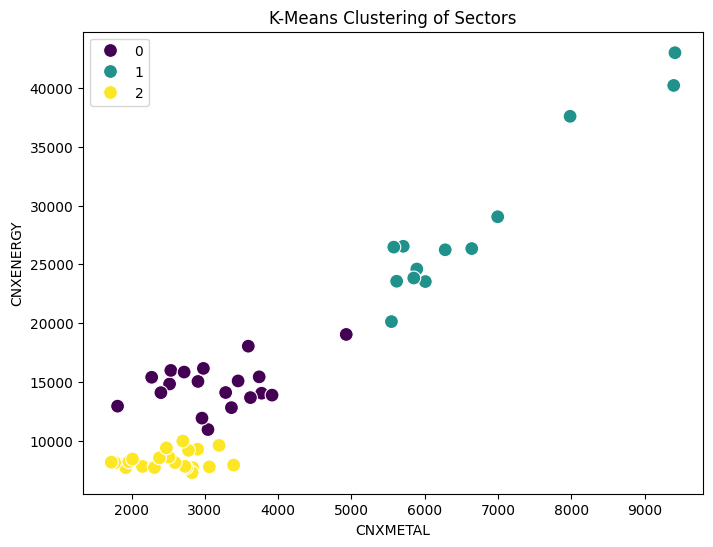

In [495]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.tsa.api import DynamicFactor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load Data
Allsector_data = pd.read_csv('/content/microeconomics_nifty_sector_Quaterly.csv',
                             parse_dates=['Date'], index_col='Date')
macro_data = pd.read_csv('/content/macro_economics_India_diffparams_Quaterlty.csv',
                         parse_dates=['Time'], index_col='Time')

# Resample macro data to match quarterly frequency (if not already in quarters)
macro_data = macro_data.resample('Q').mean()

# Ensure both datasets are aligned by quarters
sector_data = Allsector_data.resample('Q').mean()
# print("Sector Data:", sector_data.head())
# print("Macro Data:", macro_data.head())

imputer = SimpleImputer(strategy='mean')
sector_data = pd.DataFrame(imputer.fit_transform(sector_data),
                                   columns=sector_data.columns,
                                   index=sector_data.index)
print(sector_data.isna().sum())


### Exploratory Data Analysis (EDA)
def plot_cyclical_patterns(data, sector_name):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, palette='tab10', linewidth=2.5)
    plt.title(f"Cyclical Patterns - {sector_name}")
    plt.xlabel('Quarter')
    plt.ylabel('Index Value')
    plt.show()

for sector in sector_data.columns:
    print(f"\nCyclical Patterns for {sector}:")
    plot_cyclical_patterns(sector_data[[sector]], sector)

# Calculate correlation between each sector and macro variables
def compute_correlations(sector_data, macro_data):
    correlations = sector_data.corrwith(macro_data.mean(axis=1))
    print("Correlations:\n", correlations)

compute_correlations(sector_data, macro_data)

### PCA for Dimensionality Reduction and Shared Trend Detection
def apply_pca(data):
    # Standardize the data
    data_std = (data - data.mean()) / data.std()

    # Apply PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_std)

    # Plot the explained variance
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.legend(loc='best')
    plt.show()


apply_pca(sector_data)

### Dynamic Factor Model to Identify Latent Trends
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

def dynamic_factor_model(data):
    # Fitting the model with 1 factor and differenced data to improve convergence
    model = DynamicFactor(data, k_factors=1, factor_order=1, error_order=1)
    results = model.fit(maxiter=1000, disp=False)

    # Extracting factor loadings and printing them
    print("Factor Loadings:\n", results.params[:data.shape[1]])

    # Plotting factor loadings
    plt.figure(figsize=(10, 6))
    plt.bar(data.columns, results.params[:data.shape[1]])
    plt.xlabel('Sectors')
    plt.ylabel('Factor Loadings')
    plt.title('Dynamic Factor Model - Factor Loadings')
    plt.show()

    return results


# Standardize the data before fitting the model
sector_data_standardized = (sector_data - sector_data.mean()) / sector_data.std()

# Call the dynamic factor model with standardized data
results = dynamic_factor_model(sector_data_standardized)

# Check the summary and condition number for insights
print(results.summary())
print("Condition Number of Covariance Matrix:", np.linalg.cond(results.cov_params()))


### K-Means Clustering to Group Sectors by Macro Sensitivity
def apply_kmeans_clustering(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=clusters, palette='viridis', s=100)
    plt.title('K-Means Clustering of Sectors')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

apply_kmeans_clustering(sector_data)

# ### Evaluation - Sector Performance across Economic Cycles
# def evaluate_sector_performance(sector_data, macro_data):
#     # Filtering data for the selected periods
#     cycle_data = macro_data[macro_data['Cycle'] == 'Expansion']  # Example logic
#     filtered_data = sector_data.loc[cycle_data.index]

#     if filtered_data.empty:
#         print("No data available for the selected period.")
#         return

#     print("Sector Performance during Expansion:")
#     print(filtered_data.describe())

# # Call the function after ensuring matching indexes
# evaluate_sector_performance(sector_data, macro_data)



In [496]:
common_index = sector_data.index.intersection(macro_data.index)
sector_data = sector_data.loc[common_index]
macro_data = macro_data.loc[common_index]


In [497]:
full_index = macro_data.index.union(sector_data.index)
sector_data = sector_data.reindex(full_index)


In [498]:
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2011-09-30 to 2023-03-31
Freq: QE-DEC
Data columns (total 11 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                                                 12 non-null     float64
 1   Lending interest rate (%) [FR.INR.LEND]                                                                12 non-null     float64
 2   Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]                   12 non-null     float64
 3   Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]                   12 non-null     float64
 4   Unemployment, youth total (% of total labor force ages 15-24) (nati

In [499]:
import pandas as pd

# Assuming macro_data is your DataFrame
# Define a function to determine economic cycle
def determine_cycle(row):
    # Sample conditions to classify the cycle
    if (row['Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]'] > 0) and \
       (row['Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]'] < 6) and \
       (row['Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]'] < 5):
        return 'Expansion'
    else:
        return 'Contraction'

# Apply the function to create the 'Cycle' column
macro_data['Cycle'] = macro_data.apply(determine_cycle, axis=1)


In [500]:
def evaluate_sector_performance(sector_data, macro_data):
    # Check for 'Cycle' column in macro_data
    if 'Cycle' not in macro_data.columns:
        print("The 'Cycle' column does not exist in macro_data.")
        return

    # Filter for Expansion and Contraction
    expansion_data = macro_data[macro_data['Cycle'] == 'Expansion']
    contraction_data = macro_data[macro_data['Cycle'] == 'Contraction']

    # Evaluate sector performance during Expansion
    if not expansion_data.empty:
        filtered_expansion_data = sector_data.loc[expansion_data.index]
        print("Sector Performance during Expansion:")
        print(filtered_expansion_data.describe())
    else:
        print("No data available for Expansion.")

    # Evaluate sector performance during Contraction
    if not contraction_data.empty:
        filtered_contraction_data = sector_data.loc[contraction_data.index]
        print("Sector Performance during Contraction:")
        print(filtered_contraction_data.describe())
    else:
        print("No data available for Contraction.")

# Call the function after ensuring matching indexes
evaluate_sector_performance(sector_data, macro_data)


No data available for Expansion.
Sector Performance during Contraction:
          CNXMETAL     CNXENERGY    NSEMDCP50       CNXFMCG     CNXINFRA  \
count    47.000000     47.000000    47.000000     47.000000    47.000000   
mean   3234.363530  13145.237601  4388.633524  25102.981531  3258.428102   
std    1248.685349   5817.599910  2038.396240   9205.807100   841.972553   
min    1724.271435   7277.729095  1850.095115  10105.837070  2147.955444   
25%    2438.117377   8157.154715  2952.508502  18325.275565  2708.975258   
50%    2835.462291  11921.677500  4058.428331  24680.176980  3121.672820   
75%    3523.554957  15617.542080  5128.257395  30842.208420  3341.893068   
max    6280.229370  26534.891740  8661.677140  44991.655210  5222.995637   

       NIFTY_MIDCAP_100_NS       NSMIDCP          NSEI       NSEBANK  \
count            47.000000     47.000000     47.000000     47.000000   
mean          16160.975333  23936.631460  10049.984961  22399.095118   
std            7380.087196 

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2011-03-31 to 2024-09-30
Freq: QE-DEC
Data columns (total 36 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   CNXMETAL                                                                                               55 non-null     float64
 1   CNXENERGY                                                                                              55 non-null     float64
 2   NSEMDCP50                                                                                              55 non-null     float64
 3   CNXFMCG                                                                                                55 non-null     float64
 4   CNXINFRA                                                           

In [502]:
df.to_csv('/content/drive/MyDrive/TSA/data/Data Extractors/combined_quaterly_data.csv')